 # **Deep Learning Applications in Bitcoin Market Trading**
 - Group Assignment


### 1) Dataset Preprocessing
- ##### 1.1 Observe Dataset

In [ ]:
!pip install yfinance
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib

--2024-05-25 14:12:09--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-05-25 14:12:09--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netcologne.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-05-25 14:12:09--  http://netcologne.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

In [ ]:
!pip install keras-tuner


In [ ]:
# Basic packages
import pandas as pd
import numpy as np
import yfinance as yf


#EDA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Feature engineering / Preprocessing
import talib
from sklearn.preprocessing import MinMaxScaler

# Model Building
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras_tuner as kt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten



- **Bitcoin**

In [ ]:
# Load Dataset From the Yahoo Finance
btc = yf.download("BTC-USD", start = '2017-11-09', end = '2024-05-14')
btc.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920


In [ ]:
btc.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
btc.shape

(2378, 6)

In [ ]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2.378000e+03
mean,23518.922047,24064.300404,22931.753106,23540.433989,23540.433989,2.532455e+10
std,17660.035765,18086.518216,17182.371192,17672.525603,17672.525603,1.860414e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,8600.797119,8774.070312,8340.383301,8606.488525,8606.488525,1.270429e+10
50%,18853.294922,19279.175781,18320.872070,18880.188477,18880.188477,2.245971e+10
75%,36638.018555,37553.859375,35228.841797,36648.264648,36648.264648,3.404375e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


- **Nasdaq**

In [ ]:
nasdaq = yf.download("^IXIC", start = '2017-11-09', end = '2024-05-14')
nasdaq.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,6737.450195,6758.930176,6687.279785,6750.049805,6750.049805,2243500000
2017-11-10,6736.390137,6757.339844,6727.350098,6750.939941,6750.939941,1979120000
2017-11-13,6727.390137,6766.299805,6723.430176,6757.600098,6757.600098,1976460000
2017-11-14,6733.870117,6743.629883,6709.270020,6737.870117,6737.870117,1988230000
2017-11-15,6700.680176,6725.319824,6667.310059,6706.209961,6706.209961,1923730000


In [ ]:
nasdaq.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
nasdaq.shape

(1636, 6)

In [ ]:
nasdaq.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1.636000e+03
mean,11046.165187,11126.196041,10958.878388,11047.651889,11047.651889,3.938877e+09
std,2955.510003,2971.490253,2934.655631,2954.398752,2954.398752,1.523953e+09
min,6257.859863,6355.180176,6190.169922,6192.919922,6192.919922,8.721100e+08
25%,7970.037354,8005.030029,7911.339966,7961.944946,7961.944946,2.341932e+09
50%,11252.549805,11352.259766,11138.064941,11264.840332,11264.840332,4.252020e+09
75%,13674.322266,13757.014893,13554.534668,13662.699951,13662.699951,4.951755e+09
max,16517.240234,16538.859375,16393.900391,16442.199219,16442.199219,1.162119e+10


- **Crude oil**

In [ ]:
crude = yf.download("CL=F", start = '2017-11-09', end = '2024-05-14')
crude.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,56.849998,57.529999,56.689999,57.169998,57.169998,666949
2017-11-10,57.020000,57.349998,56.549999,56.740002,56.740002,541296
2017-11-13,56.900002,57.150002,56.299999,56.759998,56.759998,631619
2017-11-14,56.720001,56.770000,54.810001,55.700001,55.700001,707338
2017-11-15,55.060001,55.560001,54.880001,55.330002,55.330002,501385


In [ ]:
crude.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
crude.shape

(1637, 6)

In [ ]:
crude.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1.637000e+03
mean,67.361552,68.542981,66.081747,67.327807,67.327807,4.520865e+05
std,18.523731,18.790726,18.297480,18.576204,18.576204,2.212207e+05
min,-14.000000,13.690000,-40.320000,-37.630001,-37.630001,0.000000e+00
25%,56.430000,57.150002,55.549999,56.340000,56.340000,3.077050e+05
50%,67.879997,69.000000,66.769997,67.879997,67.879997,4.010600e+05
75%,78.540001,79.730003,77.250000,78.500000,78.500000,5.926030e+05
max,124.660004,130.500000,120.790001,123.699997,123.699997,2.288230e+06


- **Ethereum**

In [ ]:
eth = yf.download("ETH-USD", start = '2017-11-09', end = '2024-05-14')
eth.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [ ]:
eth.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2.378000e+03
mean,1336.574369,1374.267611,1295.007005,1337.490836,1337.490836,1.224438e+10
std,1165.871556,1198.514666,1128.747136,1165.791218,1165.791218,1.005560e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,241.083927,246.032352,233.797318,241.251186,241.251186,5.057162e+09
50%,1197.752075,1224.502136,1156.619019,1199.079346,1199.079346,9.775322e+09
75%,1971.576447,2031.351562,1920.968811,1976.587219,1976.587219,1.678233e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,4812.087402,8.448291e+10


In [ ]:
eth.shape

(2378, 6)

In [ ]:
# Select and rename necessary columns from Ethereum and NASDAQ DataFrames
eth = eth[['Close']].rename(columns={'Close': 'ETH_Close'})
nasdaq = nasdaq[['Close']].rename(columns={'Close': 'NASDAQ_Close'})
crude = crude[['Close']].rename(columns={'Close': 'Crude_Close'})

In [ ]:
# Reset the index to make 'Date' a column again
btc = btc.reset_index()
eth = eth.reset_index()
nasdaq = nasdaq.reset_index()
crude = crude.reset_index()

In [ ]:
merged_df = pd.merge(btc, eth, on='Date', how='left').merge(nasdaq, on='Date', how='left').merge(crude, on='Date', how='left')
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ETH_Close,NASDAQ_Close,Crude_Close
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,320.884003,6750.049805,57.169998
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,299.252991,6750.939941,56.740002
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,314.681000,NaN,NaN
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,307.907990,NaN,NaN
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,316.716003,6757.600098,56.759998


In [ ]:
merged_df.shape

(2378, 10)

In [ ]:
merged_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,ETH_Close,NASDAQ_Close,Crude_Close
count,2378,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2.378000e+03,2378.000000,1636.000000,1637.000000
mean,2021-02-09 12:00:00,23518.922047,24064.300404,22931.753106,23540.433989,23540.433989,2.532455e+10,1337.490836,11047.651889,67.327807
min,2017-11-09 00:00:00,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09,84.308296,6192.919922,-37.630001
25%,2019-06-26 06:00:00,8600.797119,8774.070312,8340.383301,8606.488525,8606.488525,1.270429e+10,241.251186,7961.944946,56.340000
50%,2021-02-09 12:00:00,18853.294922,19279.175781,18320.872070,18880.188477,18880.188477,2.245971e+10,1199.079346,11264.840332,67.879997
75%,2022-09-26 18:00:00,36638.018555,37553.859375,35228.841797,36648.264648,36648.264648,3.404375e+10,1976.587219,13662.699951,78.500000
max,2024-05-13 00:00:00,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11,4812.087402,16442.199219,123.699997
std,NaN,17660.035765,18086.518216,17182.371192,17672.525603,17672.525603,1.860414e+10,1165.791218,2954.398752,18.576204


In [ ]:
merged_df.shape

(2378, 10)

In [ ]:
merged_df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
ETH_Close         0
NASDAQ_Close    742
Crude_Close     741
dtype: int64

- ##### **1.2  Fill missing value (Method = ffill)**

In [ ]:
# Replace null values in NASDAQ_Close with the previous day's price
merged_df = merged_df.fillna(method='ffill')

In [ ]:
merged_df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
ETH_Close       0
NASDAQ_Close    0
Crude_Close     0
dtype: int64

In [ ]:
# Rename columns
merged_df.rename(columns={'Open': 'BTC_Open', 'High': 'BTC_High', 'Low': 'BTC_Low', 'Close': 'BTC_Close', 'Adj Close':'BTC_AdjClose', 'Volume': 'BTC_Volume'}, inplace=True)

In [ ]:
df = merged_df
df.head()

,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ETH_Close,NASDAQ_Close,Crude_Close
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,320.884003,6750.049805,57.169998
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,299.252991,6750.939941,56.740002
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,314.681000,6750.939941,56.740002
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,307.907990,6750.939941,56.740002
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,316.716003,6757.600098,56.759998


### 2) Exploratory Data Analysis
- 2.1  Visualize stock prices

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

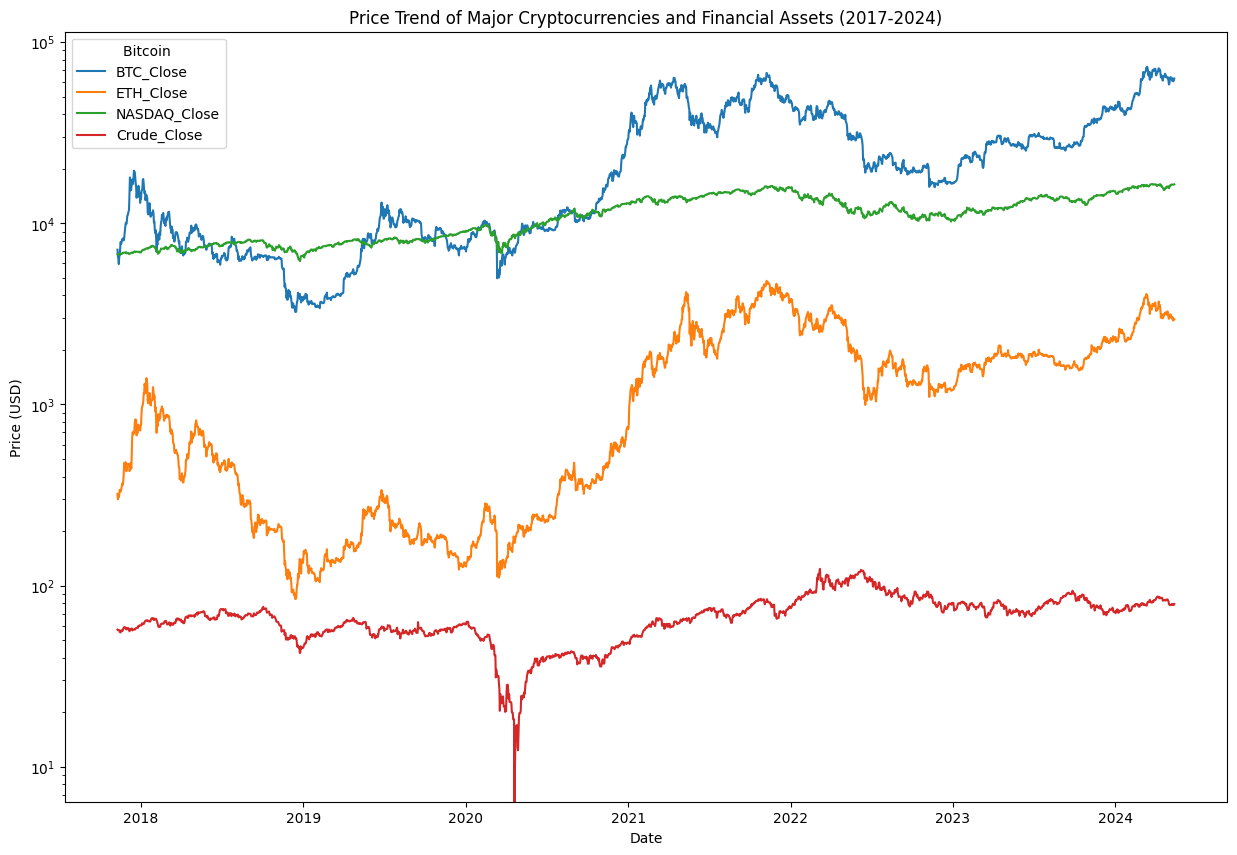

In [ ]:
# Selecting major coins for visualization
major_coins = ['Date','BTC_Close', 'ETH_Close', 'NASDAQ_Close', 'Crude_Close']

# Filter the DataFrame for major coins
df_major_variable = df[major_coins]

# Reshape the DataFrame to long format
df_long = df_major_variable.melt(id_vars='Date', var_name='Variable', value_name='Price')

# Plotting price trends for major coins
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_long, x='Date', y='Price', hue='Variable')
plt.title('Price Trend of Major Cryptocurrencies and Financial Assets (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.yscale('log')  # Using log scale for better visualization due to wide range of price values
plt.legend(title='Bitcoin ')
plt.show()

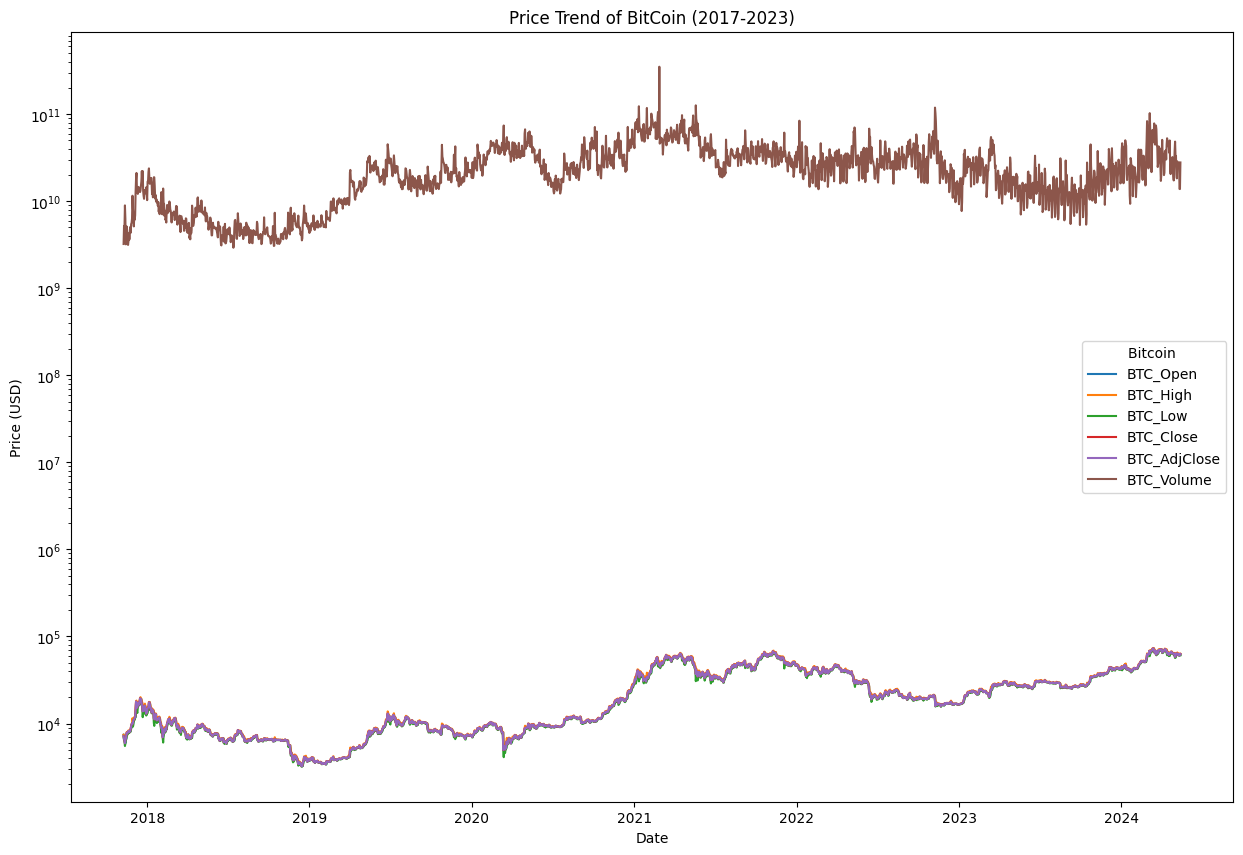

In [ ]:
# Selecting major coins for visualization
bitcoin = ['Date', 'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Close', 'BTC_AdjClose','BTC_Volume']

# Filter the DataFrame for major coins
df_major_coins = df[bitcoin]

# Reshape the DataFrame to long format
df_long = df_major_coins.melt(id_vars='Date', var_name='Bitcoin', value_name='Price')

# Plotting price trends for major coins
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_long, x='Date', y='Price', hue='Bitcoin')
plt.title('Price Trend of BitCoin (2017-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.yscale('log')  # Using log scale for better visualization due to wide range of price values
plt.legend(title='Bitcoin ')
plt.show()

- **Correlation Analysis Observations**

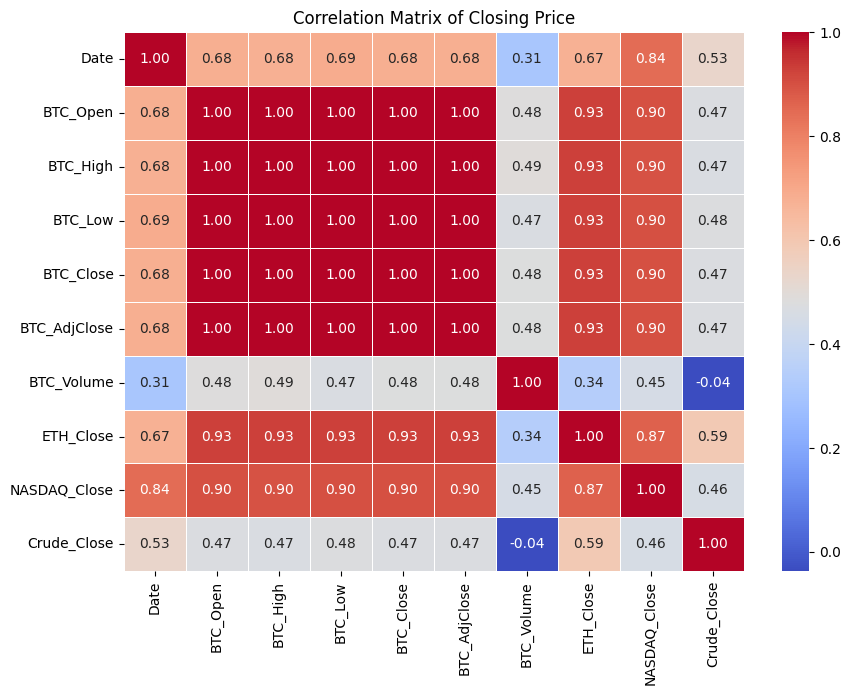

In [ ]:
# Correlation Analysis
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Closing Price')
plt.show()

- **Volatility Analysis (2017 - 2024)**

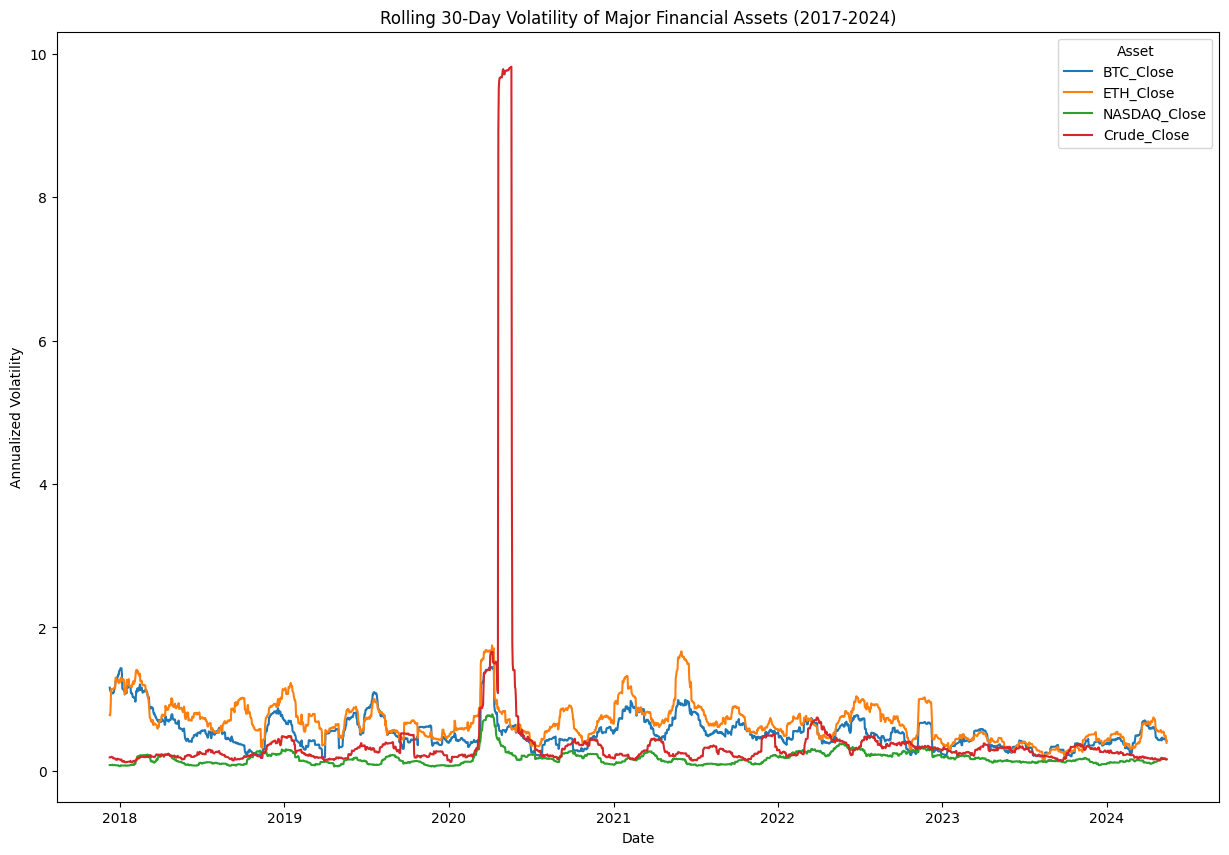

In [ ]:
# Set 'Date' as the index
df_major_variable.set_index('Date', inplace=True)

# Ensure all columns are numeric
df_major_variable = df_major_variable.apply(pd.to_numeric, errors='coerce')

# Calculate daily percentage change
df_pct_change = df_major_variable.pct_change().dropna()

# Calculate rolling volatility with a 30-day window
window = 30
df_volatility = df_pct_change.rolling(window=window).std() * (252**0.5)  # Annualize volatility
df_volatility.dropna(inplace=True)

# Plotting rolling volatility for each major coin
plt.figure(figsize=(15, 10))

for coin in df_volatility.columns:
    sns.lineplot(data=df_volatility, x=df_volatility.index, y=coin, label=coin)

plt.title('Rolling 30-Day Volatility of Major Financial Assets (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend(title='Asset')
plt.show()

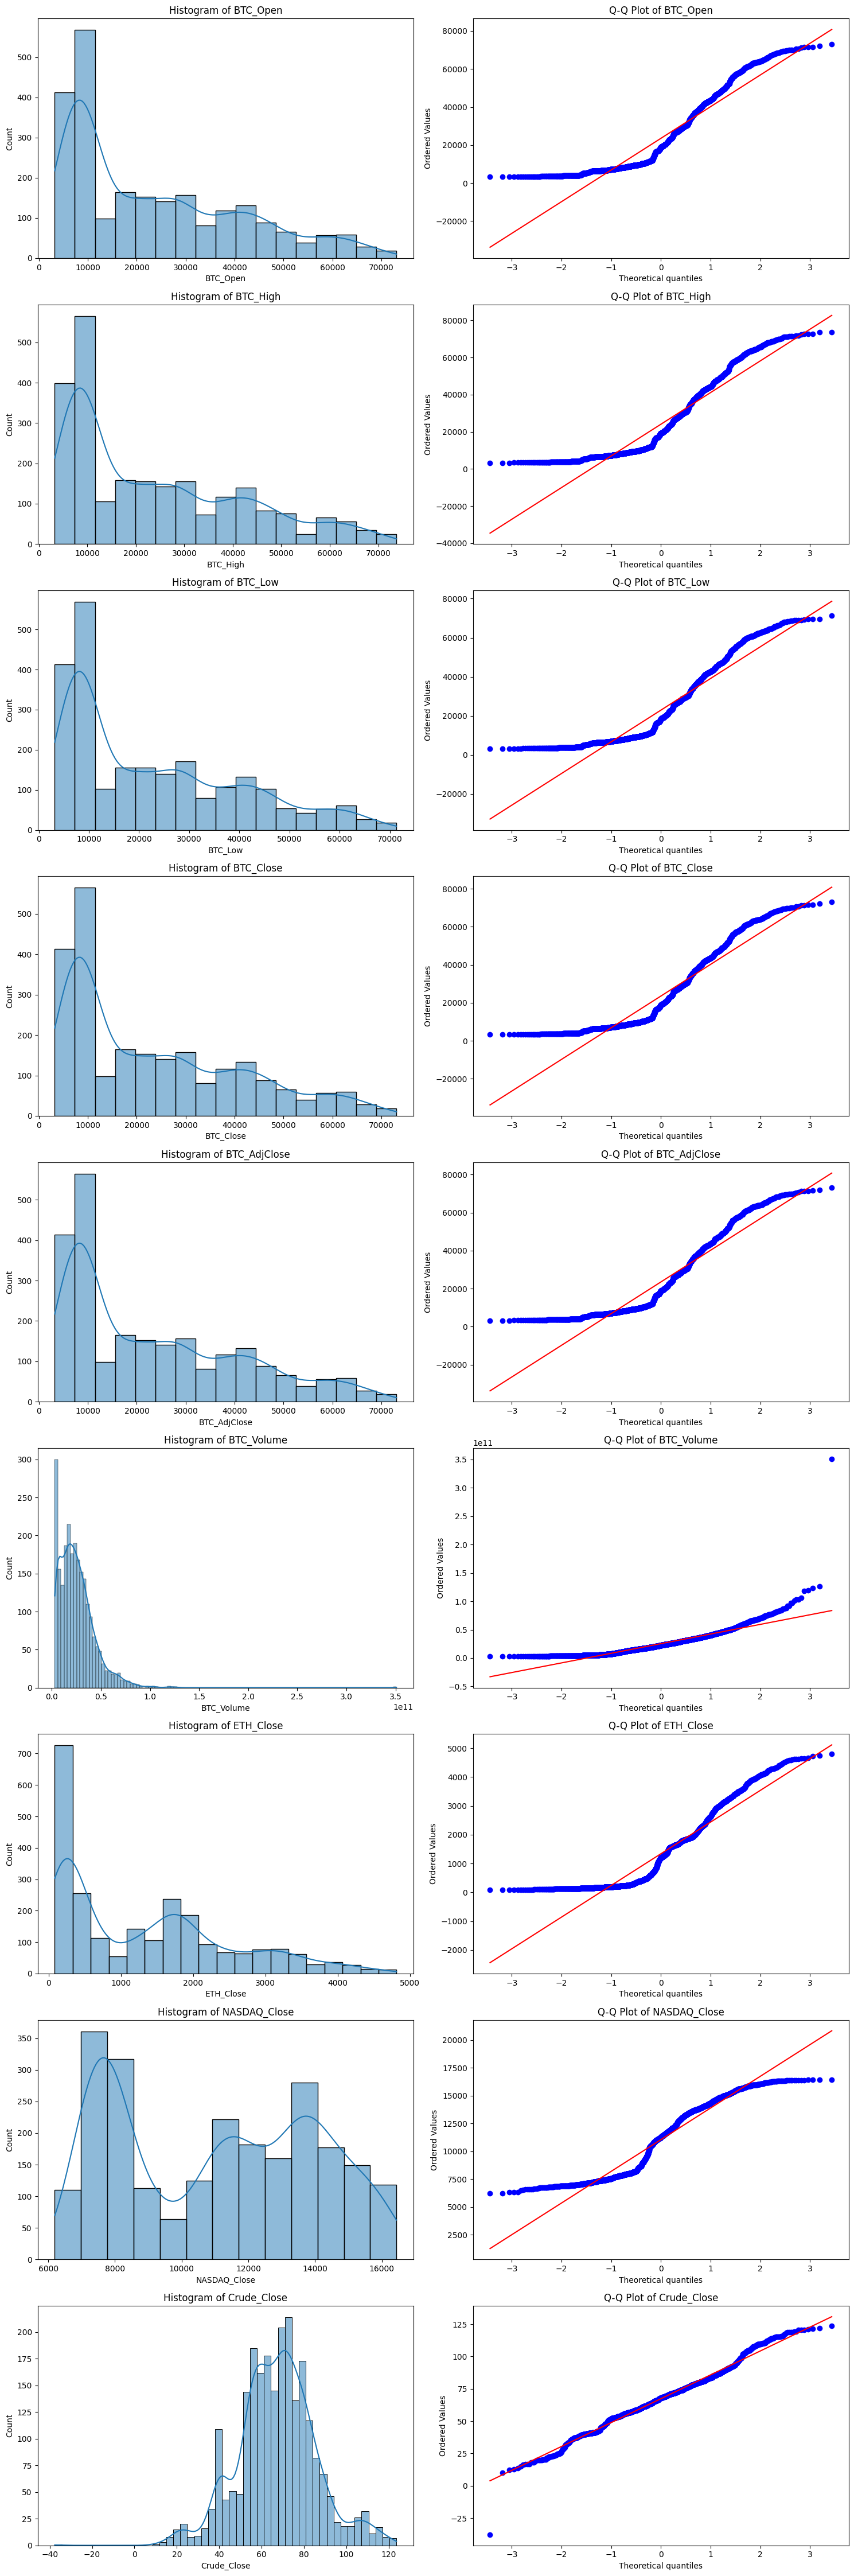

In [ ]:
# Select the numeric columns to visualize (excluding the date column)
numeric_columns = ['BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Close', 'BTC_AdjClose', 'BTC_Volume', 'ETH_Close', 'NASDAQ_Close', 'Crude_Close']

# Set up the plotting area
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(15, len(numeric_columns) * 5))

for i, column in enumerate(numeric_columns):
    # Histogram
    sns.histplot(merged_df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column}')

    # Q-Q Plot
    stats.probplot(merged_df[column], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot of {column}')

plt.tight_layout()
plt.show()

### 3) Feature Engineering

Technical indicators such as moving averages, relative strength index (RSI), Bollinger Bands, and volume-weighted average price (VWAP).

When working on a Bitcoin market trading-related problem, it's crucial to select technical indicators that are relevant and can provide insights into market trends, momentum, volatility, and potential reversals.


**Simple Moving Average (SMA) and Exponential Moving Average (EMA)**

 Moving averages are fundamental in trend analysis and can help in identifying the direction of the market, smoothing out price fluctuations, and spotting trend reversals.

 SMA - helps identify overall trend direction and potential support/resistance levels.

 EMA - Similar to SMA, but gives more weight to recent prices, making it more responsive to new information.

In [ ]:
# Calculate simple moving average (SMA) for BTC_Close over a 10-day period
df['SMA_10'] = talib.SMA(df['BTC_Close'], timeperiod=10)
# Calculate exponential moving average (EMA) for BTC_Close over a 10-day period
df['EMA_10'] = talib.EMA(df['BTC_Close'], timeperiod=10)

print(df.shape)
df.head()

(2378, 12)


,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ETH_Close,NASDAQ_Close,Crude_Close,SMA_10,EMA_10
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,320.884003,6750.049805,57.169998,NaN,NaN
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,299.252991,6750.939941,56.740002,NaN,NaN
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,314.681000,6750.939941,56.740002,NaN,NaN
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,307.907990,6750.939941,56.740002,NaN,NaN
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,316.716003,6757.600098,56.759998,NaN,NaN




**Relative Strength Index (RSI)**

RSI measures the speed and change of price movements on a scale from 0 to 100.

Typical period: 14 days: RSI values above 70 indicate overbought conditions, while values below 30 indicate oversold conditions.

Useful for identifying overbought or oversold conditions, which can signal potential price reversals. It helps in momentum analysis.

In [ ]:
# Calculate RSI for BTC_Close over a 14-day period
df['RSI_14'] = talib.RSI(df['BTC_Close'], timeperiod=14)

print(df.shape)
df.head()

(2378, 13)


,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ETH_Close,NASDAQ_Close,Crude_Close,SMA_10,EMA_10,RSI_14
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,320.884003,6750.049805,57.169998,NaN,NaN,NaN
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,299.252991,6750.939941,56.740002,NaN,NaN,NaN
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,314.681000,6750.939941,56.740002,NaN,NaN,NaN
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,307.907990,6750.939941,56.740002,NaN,NaN,NaN
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,316.716003,6757.600098,56.759998,NaN,NaN,NaN



**Moving Average Convergence Divergence (MACD)**

MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.

Standard setting: 12-day EMA, 26-day EMA, and 9-day EMA signal line

MACD is effective for identifying changes in the strength, direction, momentum, and duration of a trend. Crossovers between the MACD line and the signal line can indicate potential buy or sell signals.

MACD Line = EMA fast − EMA slow

Signal Line = EMA MACD Line

MACD Histogram = MACD Line - Signal Line




In [ ]:
# MACD calculation using EMAs
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['BTC_Close'],
    fastperiod=12,           # Fast EMA period (12)
    slowperiod=26,           # Slow EMA period (26)
    signalperiod=9           # Signal line EMA period (9)
)

print(df.shape)
df.head()

(2378, 16)


,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ETH_Close,NASDAQ_Close,Crude_Close,SMA_10,EMA_10,RSI_14,MACD,MACD_signal,MACD_hist
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,320.884003,6750.049805,57.169998,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,299.252991,6750.939941,56.740002,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,314.681000,6750.939941,56.740002,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,307.907990,6750.939941,56.740002,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,316.716003,6757.600098,56.759998,NaN,NaN,NaN,NaN,NaN,NaN


The EMA is used in the MACD calculation because it gives more weight to recent prices, making it more responsive to new information compared to the Simple Moving Average (SMA). This responsiveness makes the MACD a valuable tool for identifying changes in momentum, which is critical for making trading decisions in dynamic markets like cryptocurrency.

**On-Balance Volume (OBV)**

OBV uses volume flow to predict changes in stock price.

OBV helps in confirming price trends and potential reversals by showing if volume is flowing into or out of an asset.

In [ ]:
# On-Balance Volume (OBV)
df['OBV'] = talib.OBV(df['BTC_Close'], df['BTC_Volume'])

print(df.shape)
df.head()

(2378, 17)


,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ETH_Close,NASDAQ_Close,Crude_Close,SMA_10,EMA_10,RSI_14,MACD,MACD_signal,MACD_hist,OBV
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,320.884003,6750.049805,57.169998,NaN,NaN,NaN,NaN,NaN,NaN,3.226250e+09
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,299.252991,6750.939941,56.740002,NaN,NaN,NaN,NaN,NaN,NaN,-1.982000e+09
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,314.681000,6750.939941,56.740002,NaN,NaN,NaN,NaN,NaN,NaN,-6.890680e+09
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,307.907990,6750.939941,56.740002,NaN,NaN,NaN,NaN,NaN,NaN,-1.584803e+10
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,316.716003,6757.600098,56.759998,NaN,NaN,NaN,NaN,NaN,NaN,-9.584780e+09




*   SMA and EMA: Identify trends and trend reversals.
*   RSI: Detect overbought and oversold conditions.
*   MACD: Analyze momentum and generate buy/sell signals.
*   OBV: Confirm price trends through volume analysis.










|

In [ ]:
df.isnull().sum()

Date             0
BTC_Open         0
BTC_High         0
BTC_Low          0
BTC_Close        0
BTC_AdjClose     0
BTC_Volume       0
ETH_Close        0
NASDAQ_Close     0
Crude_Close      0
SMA_10           9
EMA_10           9
RSI_14          14
MACD            33
MACD_signal     33
MACD_hist       33
OBV              0
dtype: int64

In [ ]:
# Handling missing values by forward fill then backward fill
df = df.fillna(method='ffill').fillna(method='bfill')

print(df.isnull().sum())

Date            0
BTC_Open        0
BTC_High        0
BTC_Low         0
BTC_Close       0
BTC_AdjClose    0
BTC_Volume      0
ETH_Close       0
NASDAQ_Close    0
Crude_Close     0
SMA_10          0
EMA_10          0
RSI_14          0
MACD            0
MACD_signal     0
MACD_hist       0
OBV             0
dtype: int64


- **Correlation**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

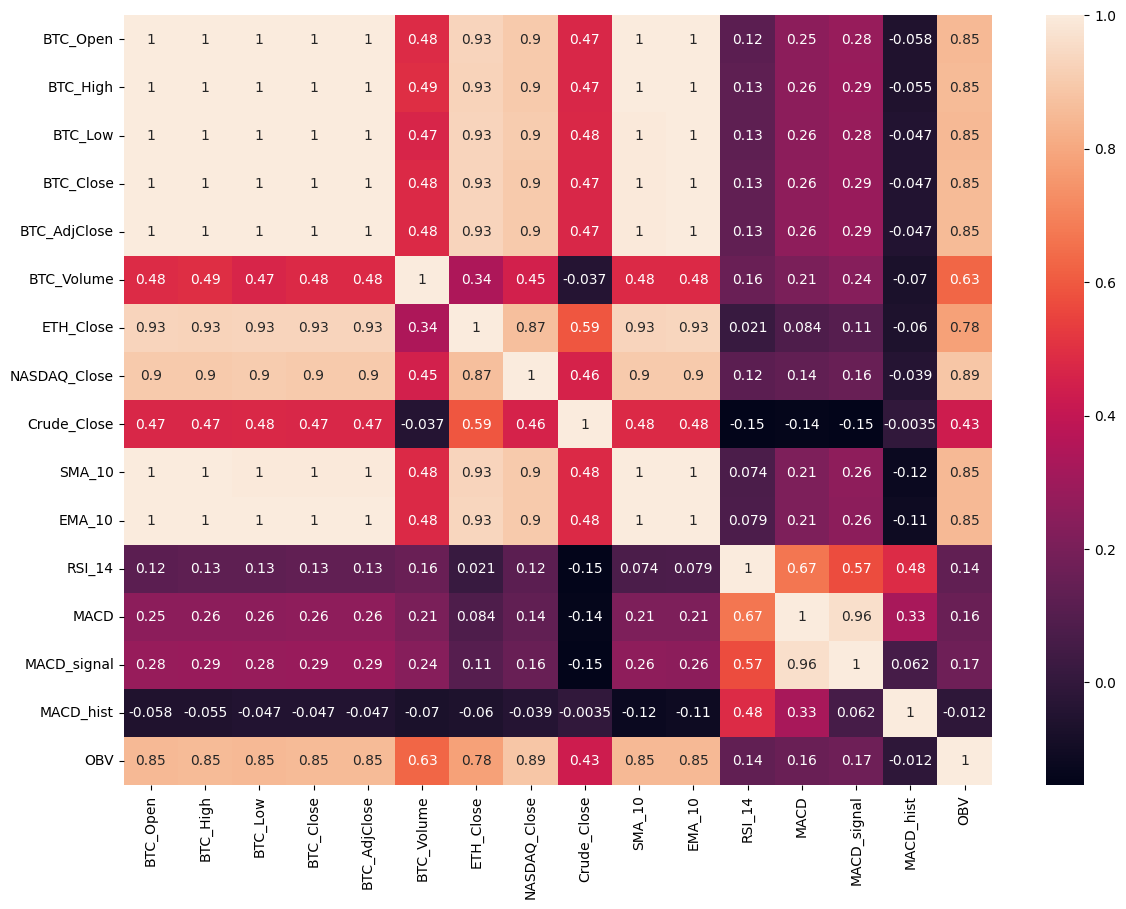

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.drop('Date', axis=1).corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### 4) Feature Selection

In [ ]:
df.head()

,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ETH_Close,NASDAQ_Close,Crude_Close,SMA_10,EMA_10,RSI_14,MACD,MACD_signal,MACD_hist,OBV
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,320.884003,6750.049805,57.169998,6995.100049,6995.100049,60.419049,2569.778255,2087.810464,481.967791,3.226250e+09
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,299.252991,6750.939941,56.740002,6995.100049,6995.100049,60.419049,2569.778255,2087.810464,481.967791,-1.982000e+09
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,314.681000,6750.939941,56.740002,6995.100049,6995.100049,60.419049,2569.778255,2087.810464,481.967791,-6.890680e+09
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,307.907990,6750.939941,56.740002,6995.100049,6995.100049,60.419049,2569.778255,2087.810464,481.967791,-1.584803e+10
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,316.716003,6757.600098,56.759998,6995.100049,6995.100049,60.419049,2569.778255,2087.810464,481.967791,-9.584780e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2378 entries, 0 to 2377
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2378 non-null   datetime64[ns]
 1   BTC_Open      2378 non-null   float64       
 2   BTC_High      2378 non-null   float64       
 3   BTC_Low       2378 non-null   float64       
 4   BTC_Close     2378 non-null   float64       
 5   BTC_AdjClose  2378 non-null   float64       
 6   BTC_Volume    2378 non-null   int64         
 7   ETH_Close     2378 non-null   float64       
 8   NASDAQ_Close  2378 non-null   float64       
 9   Crude_Close   2378 non-null   float64       
 10  SMA_10        2378 non-null   float64       
 11  EMA_10        2378 non-null   float64       
 12  RSI_14        2378 non-null   float64       
 13  MACD          2378 non-null   float64       
 14  MACD_signal   2378 non-null   float64       
 15  MACD_hist     2378 non-null   float64 

In [ ]:
imp = df.drop('Date', axis =1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define your features
features = imp.columns

# Prepare data for model
X = imp[features]
y = imp['BTC_Close'].shift(-1).dropna()  # Predict next day's BTC_Close
y.head()



0    6618.140137
1    6357.600098
2    5950.069824
3    6559.490234
4    6635.750000
Name: BTC_Close, dtype: float64

In [ ]:
X = X[:-1]  # Align X and y
X.head()

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_AdjClose,BTC_Volume,ETH_Close,NASDAQ_Close,Crude_Close,SMA_10,EMA_10,RSI_14,MACD,MACD_signal,MACD_hist,OBV
0,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984,320.884003,6750.049805,57.169998,6995.100049,6995.100049,60.419049,2569.778255,2087.810464,481.967791,3.226250e+09
1,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856,299.252991,6750.939941,56.740002,6995.100049,6995.100049,60.419049,2569.778255,2087.810464,481.967791,-1.982000e+09
2,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192,314.681000,6750.939941,56.740002,6995.100049,6995.100049,60.419049,2569.778255,2087.810464,481.967791,-6.890680e+09
3,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888,307.907990,6750.939941,56.740002,6995.100049,6995.100049,60.419049,2569.778255,2087.810464,481.967791,-1.584803e+10
4,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920,316.716003,6757.600098,56.759998,6995.100049,6995.100049,60.419049,2569.778255,2087.810464,481.967791,-9.584780e+09


In [ ]:
X.shape

(2377, 16)

- **4.1  Random Forest For feature selection**

         Feature  Importance
4   BTC_AdjClose    0.481965
3      BTC_Close    0.419426
1       BTC_High    0.075114
2        BTC_Low    0.013285
0       BTC_Open    0.008002
15           OBV    0.000268
7   NASDAQ_Close    0.000260
13   MACD_signal    0.000234
6      ETH_Close    0.000208
8    Crude_Close    0.000197
14     MACD_hist    0.000192
12          MACD    0.000192
11        RSI_14    0.000183
5     BTC_Volume    0.000180
9         SMA_10    0.000158
10        EMA_10    0.000136


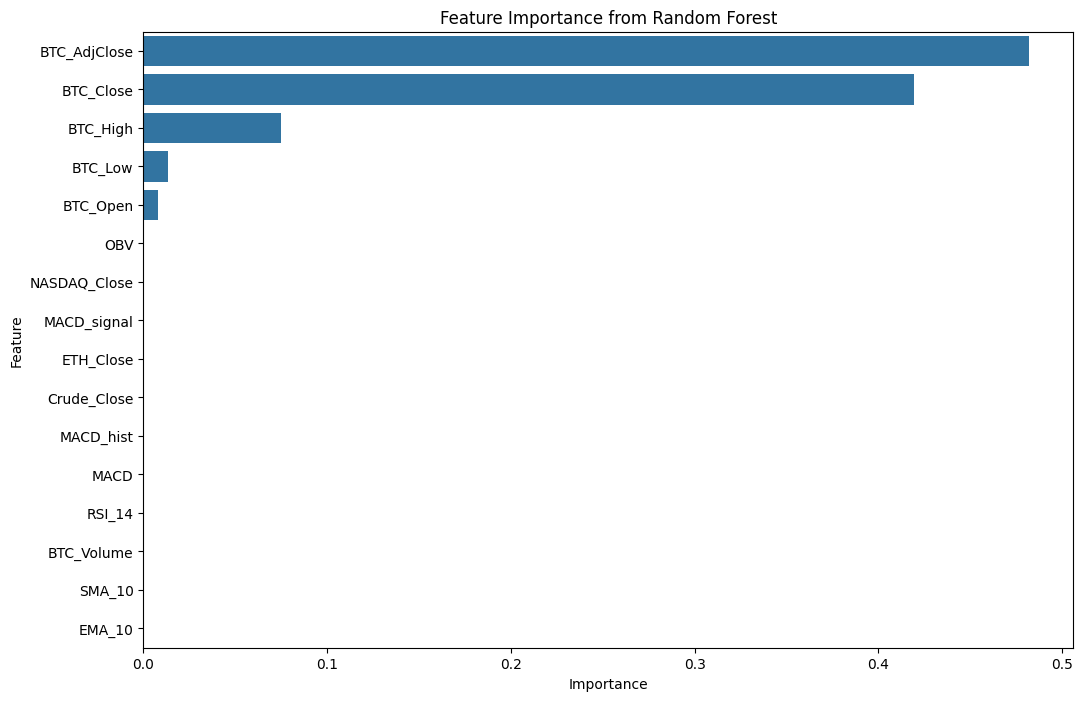

Top Features based on importance: ['BTC_AdjClose', 'BTC_Close', 'BTC_High']


In [ ]:
# Train Random Forest to find feature importance
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importance
importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()

# Select top features based on importance
top_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]['Feature'].tolist()
print("Top Features based on importance:", top_features)

**4.2 Feature Importance using Lasso Regression (L1 Regularization)**

Feature Coefficients:
BTC_Open: 0.07226695082378057
BTC_High: 0.5468347148323167
BTC_Low: 0.1284236989240217
BTC_Close: 0.6241120071179627
BTC_AdjClose: 0.0
BTC_Volume: -6.325394977663399e-09
ETH_Close: -0.19817418592126518
NASDAQ_Close: 0.10804340285530252
Crude_Close: 1.8075686641762814
SMA_10: -0.22744335174355038
EMA_10: -0.15919662452749886
RSI_14: -1.3341912664932007
MACD: -0.1393342072453683
MACD_signal: 0.07520130160324982
MACD_hist: -0.9569485438951807
OBV: 9.22664445642034e-13


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.356e+09, tolerance: 7.421e+07
  model = cd_fast.enet_coordinate_descent(


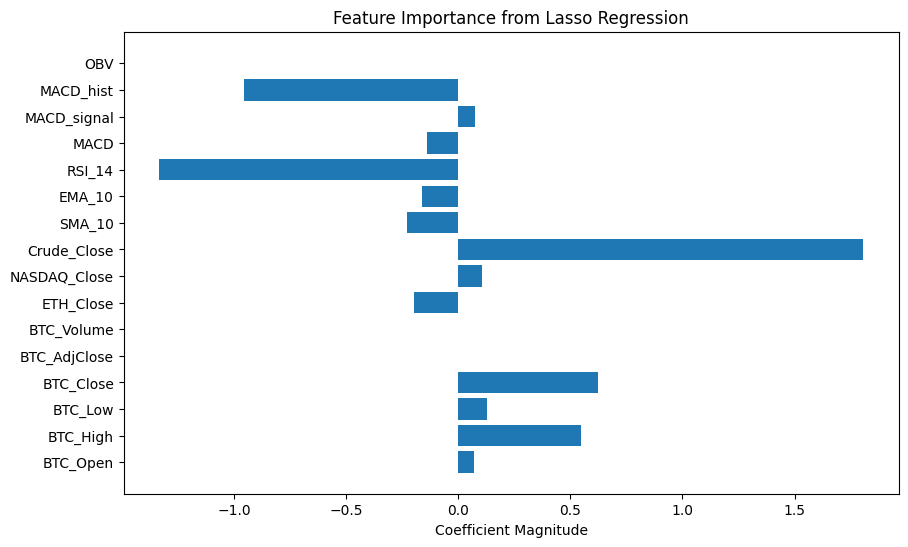

In [ ]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


# Initialize Lasso model
lasso = Lasso(alpha=0.001)  # Adjust alpha for regularization strength

# Fit model
lasso.fit(X, y)

# Extract coefficients and feature names
coefficients = lasso.coef_
feature_names = X.columns

print("Feature Coefficients:")
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance from Lasso Regression')
plt.show()

The correlation matrix indicates that BTC_Close and BTC_Adj_Close are perfectly correlated. Including both in the model could lead to multicollinearity issues. Since they carry the same information, we can choose to use only one of them. Let's use BTC_Close as it is the primary target variable.

SMA and EMA are perfectly correlated. Given the nature of the assignment, which focuses on predicting Bitcoin prices, a more responsive indicator like EMA might be more beneficial. Bitcoin prices can be highly volatile, and capturing the most recent price movements accurately could improve the performance of the predictive model.

RSI is a well-known indicator for momentum, and MACD for trend following, which might be more relevant than others. Since they are influential in financial markets, they might be beneficial for predicting bitcoin prices.

In [ ]:
# Select the final features for model training
final_features = ['BTC_Close', 'BTC_High', 'BTC_Low', 'BTC_Open', 'BTC_Volume',
                  'ETH_Close', 'NASDAQ_Close', 'Crude_Close', 'RSI_14', 'MACD_hist', 'EMA_10']

### 5) Model Building

#### **5.1 LSTM Model**

### Overview
In this section, we develop an LSTM (Long Short-Term Memory) model to predict Bitcoin closing prices. The model leverages historical data and various features to learn patterns and make predictions.

### Parameters and Methods

#### Input Parameters:
1. **`df`**:
   - The DataFrame containing the dataset, including both feature columns and the target column for Bitcoin prices.
   - Essential for providing the historical data on which the model will be trained and evaluated.

2. **`features`**:
   - A list of column names from the DataFrame that are used as features for training the model.
   - These features might include various technical indicators, market indices, and other relevant data that could help predict Bitcoin prices.

3. **`target`**:
   - The column name in the DataFrame that represents the target variable to be predicted, defaulting to `'BTC_Close'` (Bitcoin closing price).
   - The target variable is the main focus of the prediction model.

4. **`seq_length`**:
   - The length of the input sequences for the LSTM model, defaulting to `60`.
   - This parameter determines how many previous time steps the model looks at to make a prediction for the next time step.
   - A sequence length of 60 means the model uses the last 60 days of data to predict the next day's price.

5. **`epochs`**:
   - The number of epochs for training the model, defaulting to `100`.
   - An epoch represents one complete pass through the entire training dataset.
   - More epochs can lead to better learning but also risk overfitting if too high.

6. **`batch_size`**:
   - The number of samples processed before the model's internal parameters are updated, defaulting to `32`.
   - Batch size impacts the stability and speed of the training process.

#### Data Preprocessing:
- **Feature Scaling**:
  - `MinMaxScaler` is used to scale the features and target variable to a range between 0 and 1.
  - Scaling is crucial for LSTM models as they are sensitive to the scale of input data.
  - Ensures that each feature contributes proportionately to the model training process.

#### Sequence Creation:
- **`create_sequences` Function**:
  - Converts the scaled data into sequences of a specified length (`seq_length`), which are then used as inputs for the LSTM model.
  - LSTM models are designed to handle sequences of data, making this step essential.
  - This function returns arrays of input sequences and their corresponding targets.

#### Model Architecture:
- **LSTM Layers**:
  - Long Short-Term Memory (LSTM) layers are a type of recurrent neural network (RNN) capable of learning long-term dependencies.
  - `units=50`: Specifies the number of LSTM units (neurons) in the layer.
  - `return_sequences=True` in the first LSTM layer ensures that the output is a sequence, which is needed when stacking multiple LSTM layers.

- **Dropout Layers**:
  - Dropout is a regularization technique to prevent overfitting by randomly setting a fraction of input units to 0 during training.
  - `Dropout(0.2)`: 20% of the units are dropped during training.

- **Dense Layer**:
  - A fully connected (Dense) layer with a single neuron, which outputs the predicted Bitcoin price.
  - It serves as the final layer in the model to produce the prediction.

#### Model Compilation and Training:
- **Compilation**:
  - The model is compiled using the Adam optimizer, which is an efficient and popular optimization algorithm.
  - The loss function used is `mean_squared_error`, which measures the average squared difference between predicted and actual values.

- **Training**:
  - The model is trained using the training data, with the validation data used to monitor the model's performance on unseen data during training.
  - `epochs=100` and `batch_size=32` determine how the training process is carried out.

#### Model Evaluation:
- **Loss Metrics**:
  - Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.
  - Root Mean Squared Error (RMSE): The square root of MSE, providing error in the same units as the target variable.
  - Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values.

- **R-squared (R²)**:
  - Indicates the proportion of the variance in the target variable that is predictable from the features.
  - A higher R² indicates a better fit of the model to the data.

#### Prediction and Visualization:
- **Predictions**:
  - The trained model is used to make predictions on the training, validation, and test datasets.
  - Predictions are inverse scaled to obtain actual price values.

- **Visualization**:
  - Plots of actual vs. predicted prices for training, validation, and test sets to visually assess the model's performance.
  - Plots of training and validation loss over epochs to monitor training progress and potential overfitting.

#### Comprehensive Explanation
Below function effectively encapsulates the workflow of building an LSTM model for time series forecasting, particularly for predicting Bitcoin prices. The parameters and methods used are carefully chosen to prepare the data, train the model, and evaluate its performance comprehensively. By scaling the data, creating sequences, defining an appropriate LSTM architecture, and visualizing the results, the function provides a robust framework for developing predictive models in financial time series analysis.


In [ ]:
def scale_and_split_data(df, features, target='BTC_Close', seq_length=60):
    # Separate features and target
    X = df[features]
    y = df[target]

    # Scale the features and target
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    price_scaler = MinMaxScaler()
    y_scaled = price_scaler.fit_transform(y.values.reshape(-1, 1))

    # Create sequences for LSTM
    def create_sequences(data, target, seq_length):
        sequences = []
        targets = []
        for i in range(len(data) - seq_length):
            sequences.append(data[i:i + seq_length])
            targets.append(target[i + seq_length])
        return np.array(sequences), np.array(targets)

    X_sequences, y_sequences = create_sequences(X_scaled, y_scaled, seq_length)

    # Split sequences into training, validation, and testing sets
    train_size = int(len(X_sequences) * 0.7)
    val_size = int(len(X_sequences) * 0.2)
    X_train, X_val, X_test = X_sequences[:train_size], X_sequences[train_size:train_size+val_size], X_sequences[train_size+val_size:]
    y_train, y_val, y_test = y_sequences[:train_size], y_sequences[train_size:train_size+val_size], y_sequences[train_size+val_size:]

    return X_train, X_val, X_test, y_train, y_val, y_test, price_scaler, train_size, val_size

In [ ]:
def train_evaluate_lstm(X_train, X_val, X_test, y_train, y_val, y_test, price_scaler, train_size, val_size, df, seq_length=60, epochs=100, batch_size=32):
    # Define the LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(LSTM(units=50, return_sequences=False))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(Dense(1))

    # Compile the model
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history_lstm = model_lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

    # Evaluate the model
    train_loss = model_lstm.evaluate(X_train, y_train)
    val_loss = model_lstm.evaluate(X_val, y_val)
    test_loss = model_lstm.evaluate(X_test, y_test)

    print('Train Loss (MSE):', train_loss)
    print('Validation Loss (MSE):', val_loss)
    print('Test Loss (MSE):', test_loss)

    # Calculate RMSE and MAE
    train_rmse_lstm = np.sqrt(train_loss)
    val_rmse_lstm = np.sqrt(val_loss)
    test_rmse_lstm = np.sqrt(test_loss)

    train_mae_lstm = mean_absolute_error(y_train, model_lstm.predict(X_train))
    val_mae_lstm = mean_absolute_error(y_val, model_lstm.predict(X_val))
    test_mae_lstm = mean_absolute_error(y_test, model_lstm.predict(X_test))

    print('Train RMSE:', train_rmse_lstm)
    print('Validation RMSE:', val_rmse_lstm)
    print('Test RMSE:', test_rmse_lstm)

    print('Train MAE:', train_mae_lstm)
    print('Validation MAE:', val_mae_lstm)
    print('Test MAE:', test_mae_lstm)

    # R-squared
    train_r2_lstm = r2_score(y_train, model_lstm.predict(X_train))
    val_r2_lstm = r2_score(y_val, model_lstm.predict(X_val))
    test_r2_lstm = r2_score(y_test, model_lstm.predict(X_test))

    print('Train R-squared:', train_r2_lstm)
    print('Validation R-squared:', val_r2_lstm)
    print('Test R-squared:', test_r2_lstm)

    # Make predictions
    train_predict = model_lstm.predict(X_train)
    val_predict = model_lstm.predict(X_val)
    test_predict = model_lstm.predict(X_test)

    # Invert scaling for predictions
    train_predict = price_scaler.inverse_transform(train_predict)
    val_predict = price_scaler.inverse_transform(val_predict)
    test_predict = price_scaler.inverse_transform(test_predict)

    # Reshape and invert scaling for comparison with original data
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    y_train = price_scaler.inverse_transform(y_train)
    y_val = price_scaler.inverse_transform(y_val)
    y_test = price_scaler.inverse_transform(y_test)

    # Create DataFrames with appropriate indices for plotting
    train_indices = df.index[seq_length:train_size+seq_length]
    val_indices = df.index[train_size+seq_length:train_size+seq_length+val_size]
    test_indices = df.index[train_size+seq_length+val_size:]

    time_y_train = pd.DataFrame(data=y_train, index=train_indices, columns=["Actual"])
    time_y_val = pd.DataFrame(data=y_val, index=val_indices, columns=["Actual"])
    time_y_test = pd.DataFrame(data=y_test, index=test_indices, columns=["Actual"])

    time_y_train_prediction = pd.DataFrame(data=train_predict, index=train_indices, columns=["Prediction"])
    time_y_val_prediction = pd.DataFrame(data=val_predict, index=val_indices, columns=["Prediction"])
    time_y_test_prediction = pd.DataFrame(data=test_predict, index=test_indices, columns=["Prediction"])

    plt.style.use('seaborn-dark')
    plt.figure(figsize=(12, 8))

    plt.plot(time_y_train, label="Training", color="green", marker='.')
    plt.plot(time_y_val, label="Validation", color="blue", marker='.')
    plt.plot(time_y_test, label="Test", marker='.')
    plt.plot(time_y_train_prediction, color="red", label="Prediction")
    plt.plot(time_y_val_prediction, color="purple", label="Prediction (Validation)")
    plt.plot(time_y_test_prediction, color="orange", label="Prediction (Test)")
    plt.title("LSTM fit of Bitcoin Prices", size=20)
    plt.tight_layout()
    sns.despine(top=True)
    plt.ylabel('Bitcoin Price', size=15)
    plt.xlabel('Date', size=15)
    plt.legend(fontsize=15)
    plt.grid()

    plt.show()

    # Plot training & validation loss values
    plt.figure()
    plt.plot(history_lstm.history['loss'], label='Train Loss')
    plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return model_lstm, history_lstm, time_y_test, time_y_test_prediction, val_rmse_lstm, test_rmse_lstm, val_mae_lstm, test_mae_lstm, val_r2_lstm, test_r2_lstm

In [ ]:
# Assuming df is your DataFrame and 'features' is a list of feature columns
features =  ['BTC_Open', 'BTC_Volume',
                  'ETH_Close', 'NASDAQ_Close', 'Crude_Close', 'RSI_14', 'MACD_hist', 'EMA_10']
X_train, X_val, X_test, y_train, y_val, y_test, price_scaler, train_size, val_size = scale_and_split_data(df, features, target='BTC_Close', seq_length=60)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)
print("Price scaler:", price_scaler)
print("Train size:", train_size)
print("Validation size:", val_size)



X_train shape: (1622, 60, 8)
X_val shape: (463, 60, 8)
X_test shape: (233, 60, 8)
y_train shape: (1622, 1)
y_val shape: (463, 1)
y_test shape: (233, 1)
Price scaler: MinMaxScaler()
Train size: 1622
Validation size: 463


Epoch 1/100
51/51 [==============================] - 13s 172ms/step - loss: 0.0105 - val_loss: 0.0012
Epoch 2/100
51/51 [==============================] - 7s 134ms/step - loss: 0.0032 - val_loss: 3.5622e-04
Epoch 3/100
51/51 [==============================] - 8s 153ms/step - loss: 0.0026 - val_loss: 3.7946e-04
Epoch 4/100
51/51 [==============================] - 7s 128ms/step - loss: 0.0024 - val_loss: 2.5850e-04
Epoch 5/100
51/51 [==============================] - 9s 173ms/step - loss: 0.0020 - val_loss: 3.4408e-04
Epoch 6/100
51/51 [==============================] - 7s 140ms/step - loss: 0.0018 - val_loss: 6.3697e-04
Epoch 7/100
51/51 [==============================] - 4s 88ms/step - loss: 0.0019 - val_loss: 2.9445e-04
Epoch 8/100
51/51 [==============================] - 4s 71ms/step - loss: 0.0018 - val_loss: 3.7462e-04
Epoch 9/100
51/51 [==============================] - 3s 64ms/step - loss: 0.0018 - val_loss: 4.0217e-04
Epoch 10/100
51/51 [==============================] - 3s 64ms

<ipython-input-54-e2c380cf2620>:82: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


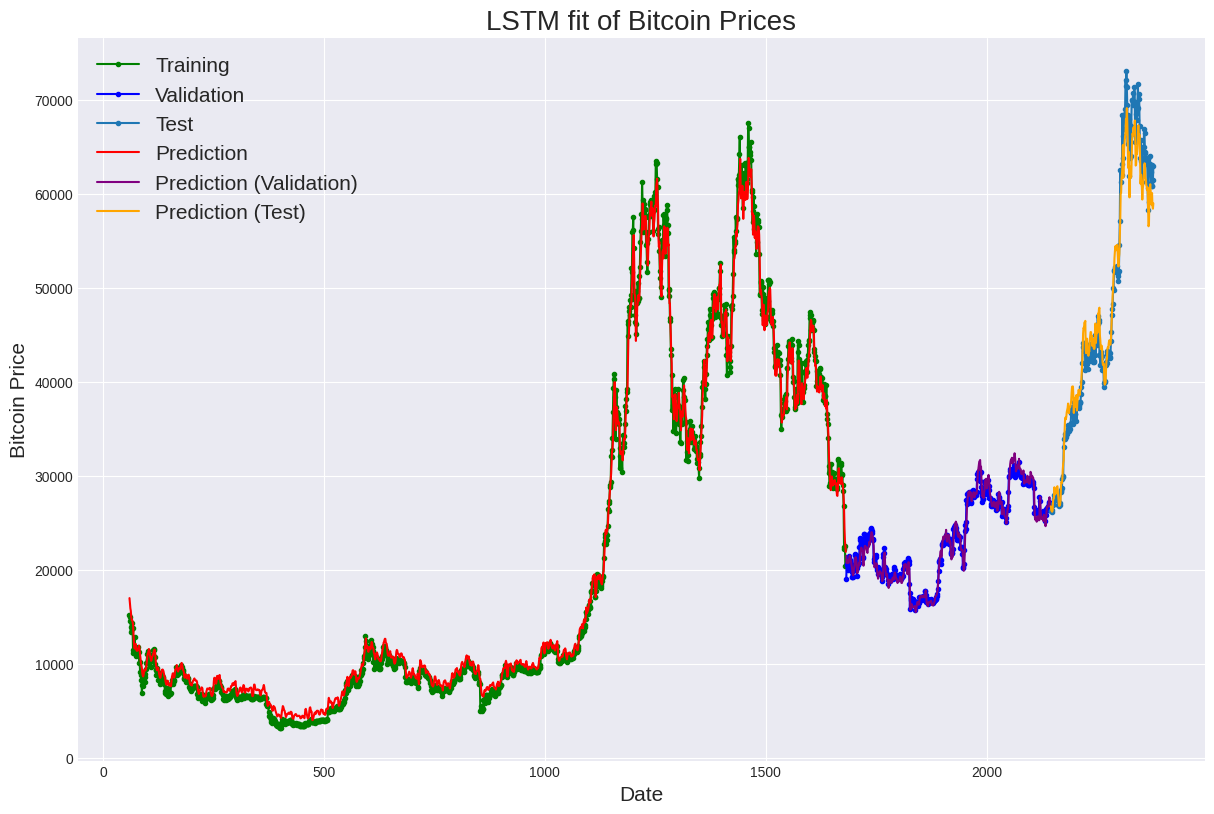

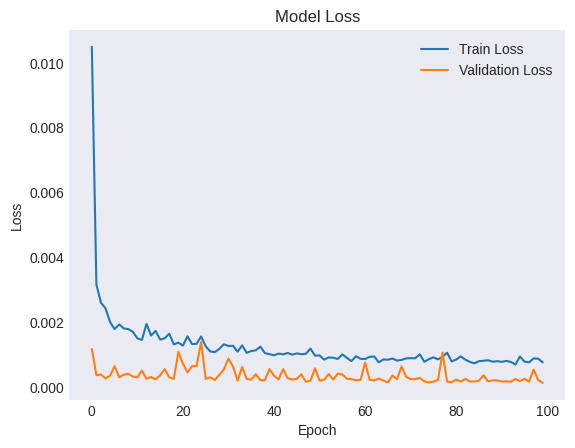

In [ ]:
# Train and evaluate the LSTM model
model_lstm, history_lstm, time_y_test, time_y_test_prediction, val_rmse_lstm, test_rmse_lstm, val_mae_lstm, test_mae_lstm, val_r2_lstm, test_r2_lstm = train_evaluate_lstm(X_train, X_val, X_test, y_train, y_val, y_test, price_scaler, train_size, val_size, df, seq_length=60, epochs=100, batch_size=32)


The plot suggests that the model predictions closely match the actual prices. This could indicate that the LSTM model is performing well on the test data.

- **LSTM Model build with Hyperparameter Tuning**

In [ ]:
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50),
                   return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_units', min_value=25, max_value=100, step=25)))
    model.add(Dense(1))

    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='hyperparameter_tuning',
    project_name='lstm_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units: {best_hps.get('units')}")
print(f"Best dropout_rate: {best_hps.get('dropout_rate')}")
print(f"Best optimizer: {best_hps.get('optimizer')}")
print(f"Best dense_units: {best_hps.get('dense_units')}")

# Train the final model with the best hyperparameters
model_tuned = tuner.hypermodel.build(best_hps)
history_tuned = model_tuned.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

# Evaluate the model
train_loss = model_tuned.evaluate(X_train, y_train)
val_loss = model_tuned.evaluate(X_val, y_val)
test_loss = model_tuned.evaluate(X_test, y_test)

print('Train Loss (MSE):', train_loss)
print('Validation Loss (MSE):', val_loss)
print('Test Loss (MSE):', test_loss)

# Calculate RMSE and MAE
train_rmse = np.sqrt(train_loss)
val_rmse = np.sqrt(val_loss)
test_rmse = np.sqrt(test_loss)

train_mae = mean_absolute_error(y_train, model_tuned.predict(X_train))
val_mae = mean_absolute_error(y_val, model_tuned.predict(X_val))
test_mae = mean_absolute_error(y_test, model_tuned.predict(X_test))

print('Train RMSE:', train_rmse)
print('Validation RMSE:', val_rmse)
print('Test RMSE:', test_rmse)

print('Train MAE:', train_mae)
print('Validation MAE:', val_mae)
print('Test MAE:', test_mae)

# R-squared
train_r2 = r2_score(y_train, model_tuned.predict(X_train))
val_r2 = r2_score(y_val, model_tuned.predict(X_val))
test_r2 = r2_score(y_test, model_tuned.predict(X_test))

print('Train R-squared:', train_r2)
print('Validation R-squared:', val_r2)
print('Test R-squared:', test_r2)

# Make predictions
train_predict = model_tuned.predict(X_train)
val_predict = model_tuned.predict(X_val)
test_predict = model_tuned.predict(X_test)

# Invert scaling for predictions
train_predict = price_scaler.inverse_transform(train_predict)
val_predict = price_scaler.inverse_transform(val_predict)
test_predict = price_scaler.inverse_transform(test_predict)

# Reshape and invert scaling for comparison with original data
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = price_scaler.inverse_transform(y_train)
y_val = price_scaler.inverse_transform(y_val)
y_test = price_scaler.inverse_transform(y_test)

# Create DataFrames with appropriate indices for plotting
seq_length = 60
train_indices = df.index[seq_length:seq_length+len(y_train)]
val_indices = df.index[seq_length+len(y_train):seq_length+len(y_train)+len(y_val)]
test_indices = df.index[seq_length+len(y_train)+len(y_val):seq_length+len(y_train)+len(y_val)+len(y_test)]

time_y_train = pd.DataFrame(data=y_train, index=train_indices, columns=["Actual"])
time_y_val = pd.DataFrame(data=y_val, index=val_indices, columns=["Actual"])
time_y_test = pd.DataFrame(data=y_test, index=test_indices, columns=["Actual"])

time_y_train_prediction = pd.DataFrame(data=train_predict, index=train_indices, columns=["Prediction"])
time_y_val_prediction = pd.DataFrame(data=val_predict, index=val_indices, columns=["Prediction"])
time_y_test_prediction = pd.DataFrame(data=test_predict, index=test_indices, columns=["Prediction"])

plt.style.use('seaborn-dark')
plt.figure(figsize=(12, 8))

plt.plot(time_y_train, label="Training", color="green", marker='.')
plt.plot(time_y_val, label="Validation", color="blue", marker='.')
plt.plot(time_y_test, label="Test", marker='.')
plt.plot(time_y_train_prediction, color="red", label="Prediction")
plt.plot(time_y_val_prediction, color="purple", label="Prediction (Validation)")
plt.plot(time_y_test_prediction, color="orange",label="Prediction (Test)")
plt.title("LSTM fit of Bitcoin Prices", size=20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('Bitcoin Price', size=15)
plt.xlabel('Date', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show()

# Plot training & validation loss values
plt.figure()
plt.plot(history_tuned.history['loss'], label='Train Loss')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



#### **5.2) Transformer Model**

In [ ]:
def train_evaluate_transformer(X_train, X_val, X_test, y_train, y_val, y_test, price_scaler, train_size, val_size, df, seq_length=60, epochs=100, batch_size=32, d_model=64, num_heads=4, num_layers=2):

    # Define transformer model
    def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
        x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
        x = Dropout(dropout)(x)
        x = LayerNormalization(epsilon=1e-6)(x)
        res = x + inputs

        x = Dense(ff_dim, activation="relu")(res)
        x = Dropout(dropout)(x)
        x = Dense(inputs.shape[-1])(x)
        return LayerNormalization(epsilon=1e-6)(x + res)

    input_layer = Input(shape=(seq_length, X_train.shape[2]))
    x = input_layer

    for _ in range(num_layers):
        x = transformer_encoder(x, head_size=d_model, num_heads=num_heads, ff_dim=d_model, dropout=0.1)

    x = Dense(1)(x[:, -1, :])

    model_transformer = Model(inputs=input_layer, outputs=x)
    model_transformer.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')

    # Train the model
    history_transformer = model_transformer.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)], verbose=0)

    # Evaluate the model
    train_loss = model_transformer.evaluate(X_train, y_train, verbose=0)
    val_loss = model_transformer.evaluate(X_val, y_val, verbose=0)
    test_loss = model_transformer.evaluate(X_test, y_test, verbose=0)

    print('Train Loss (MSE):', train_loss)
    print('Validation Loss (MSE):', val_loss)
    print('Test Loss (MSE):', test_loss)

    # Calculate RMSE and MAE
    train_rmse_transformer = np.sqrt(train_loss)
    val_rmse_transformer = np.sqrt(val_loss)
    test_rmse_transformer = np.sqrt(test_loss)

    train_mae_transformer = mean_absolute_error(y_train, model_transformer.predict(X_train))
    val_mae_transformer = mean_absolute_error(y_val, model_transformer.predict(X_val))
    test_mae_transformer = mean_absolute_error(y_test, model_transformer.predict(X_test))

    print('Train RMSE:', train_rmse_transformer)
    print('Validation RMSE:', val_rmse_transformer)
    print('Test RMSE:', test_rmse_transformer)

    print('Train MAE:', train_mae_transformer)
    print('Validation MAE:', val_mae_transformer)
    print('Test MAE:', test_mae_transformer)

    # R-squared
    train_r2_transformer = r2_score(y_train, model_transformer.predict(X_train))
    val_r2_transformer = r2_score(y_val, model_transformer.predict(X_val))
    test_r2_transformer = r2_score(y_test, model_transformer.predict(X_test))

    print('Train R-squared:', train_r2_transformer)
    print('Validation R-squared:', val_r2_transformer)
    print('Test R-squared:', test_r2_transformer)

    # Make predictions
    train_predict = model_transformer.predict(X_train)
    val_predict = model_transformer.predict(X_val)
    test_predict = model_transformer.predict(X_test)

    # Invert scaling for predictions
    train_predict = price_scaler.inverse_transform(train_predict)
    val_predict = price_scaler.inverse_transform(val_predict)
    test_predict = price_scaler.inverse_transform(test_predict)

    # Reshape and invert scaling for comparison with original data
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    y_train = price_scaler.inverse_transform(y_train)
    y_val = price_scaler.inverse_transform(y_val)
    y_test = price_scaler.inverse_transform(y_test)

    # Create DataFrames with appropriate indices for plotting
    train_indices = df.index[seq_length:train_size+seq_length]
    val_indices = df.index[train_size+seq_length:train_size+seq_length+val_size]
    test_indices = df.index[train_size+seq_length+val_size:]

    time_y_train = pd.DataFrame(data=y_train, index=train_indices, columns=["Actual"])
    time_y_val = pd.DataFrame(data=y_val, index=val_indices, columns=["Actual"])
    time_y_test = pd.DataFrame(data=y_test, index=test_indices, columns=["Actual"])

    time_y_train_prediction = pd.DataFrame(data=train_predict, index=train_indices, columns=["Prediction"])
    time_y_val_prediction = pd.DataFrame(data=val_predict, index=val_indices, columns=["Prediction"])
    time_y_test_prediction = pd.DataFrame(data=test_predict, index=test_indices, columns=["Prediction"])

    plt.style.use('seaborn-dark')
    plt.figure(figsize=(12, 8))

    plt.plot(time_y_train, label="Training", color="green", marker='.')
    plt.plot(time_y_val, label="Validation", color="blue", marker='.')
    plt.plot(time_y_test, label="Test", marker='.')
    plt.plot(time_y_train_prediction, color="red", label="Prediction")
    plt.plot(time_y_val_prediction, color="purple", label="Prediction (Validation)")
    plt.plot(time_y_test_prediction, color="orange",label="Prediction (Test)")
    plt.title("Transformer fit of Bitcoin Prices", size=20)
    plt.tight_layout()
    sns.despine(top=True)
    plt.ylabel('Bitcoin Price', size=15)
    plt.xlabel('Date', size=15)
    plt.legend(fontsize=15)
    plt.grid()

    plt.show()

    # Plot training & validation loss values
    plt.figure()
    plt.plot(history_transformer.history['loss'], label='Train Loss')
    plt.plot(history_transformer.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return model_transformer, history_transformer, test_rmse_transformer, test_r2_transformer, test_mae_transformer, val_rmse_transformer, val_mae_transformer, val_r2_transformer


Train Loss (MSE): 0.007731569465249777
Validation Loss (MSE): 0.0029875081963837147
Test Loss (MSE): 0.027875803411006927
8/8 [==============================] - 0s 35ms/step
Train RMSE: 0.08792934359614984
Validation RMSE: 0.05465810275141019
Test RMSE: 0.16696048457945648
Train MAE: 0.06001734562345723
Validation MAE: 0.044214578338803545
Test MAE: 0.1288047161023564
8/8 [==============================] - 0s 34ms/step
Train R-squared: 0.8835412668596335
Validation R-squared: 0.2437052506565991
Test R-squared: 0.29855655817597926
8/8 [==============================] - 0s 36ms/step


<ipython-input-58-73f58721d87b>:95: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


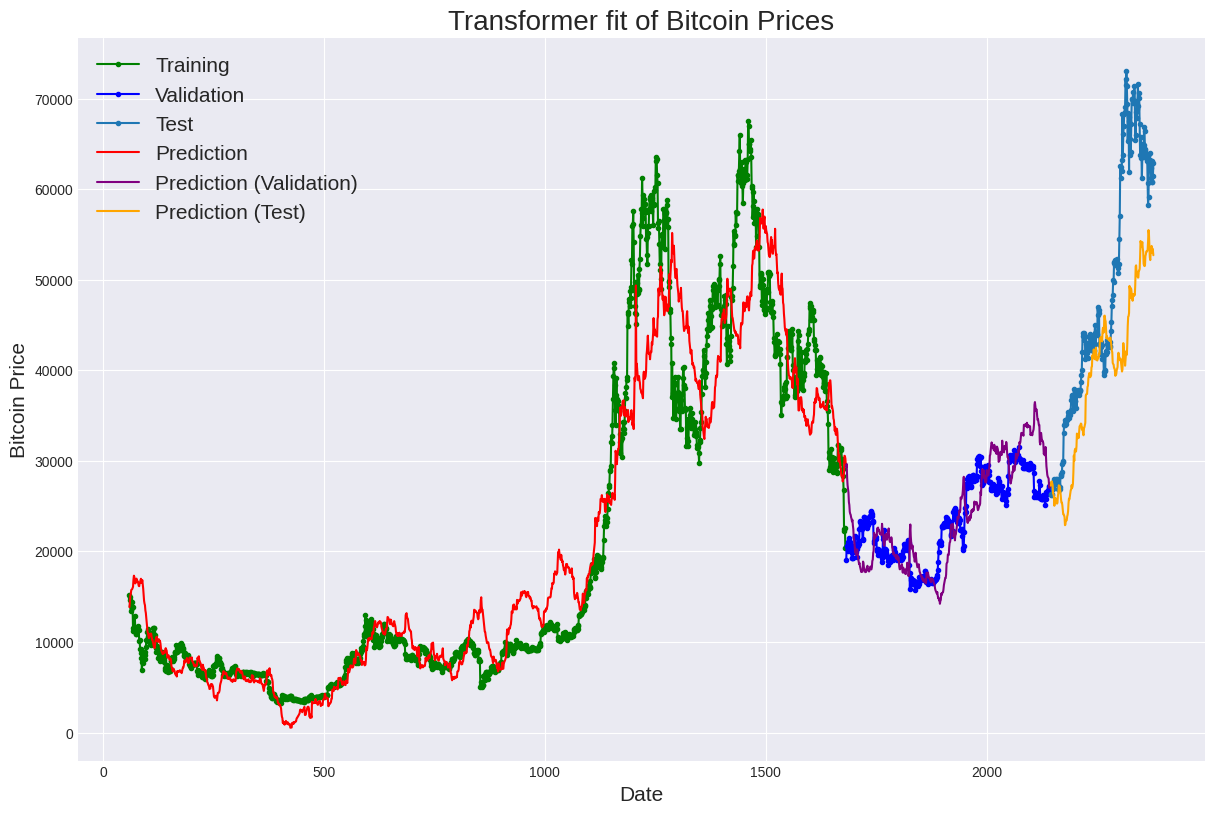

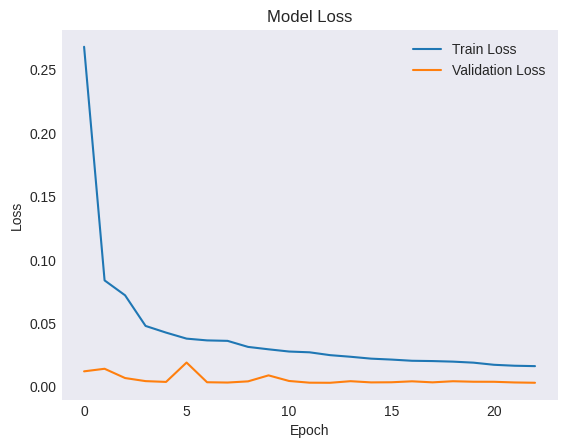

In [ ]:
# Call the function
model_transformer, history_transformer, test_rmse_transformer, test_r2_transformer, test_mae_transformer, val_rmse_transformer, val_mae_transformer, val_r2_transformer = train_evaluate_transformer(X_train, X_val, X_test, y_train, y_val, y_test, price_scaler, train_size, val_size, df, seq_length=60, epochs=100, batch_size=32)


#### **5.3 CNN Model**

In [ ]:
def train_evaluate_cnn(X_train, X_val, X_test, y_train, y_val, y_test, price_scaler, train_size, val_size, df, seq_length=60, epochs=100, batch_size=32, filters=64, kernel_size=3):
    # Define CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(seq_length, X_train.shape[2])))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(50, activation='relu'))
    model_cnn.add(Dropout(0.2))
    model_cnn.add(Dense(1))

    model_cnn.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')

    # Train the model
    history_cnn = model_cnn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)], verbose=0)

    # Evaluate the model
    train_loss = model_cnn.evaluate(X_train, y_train, verbose=0)
    val_loss = model_cnn.evaluate(X_val, y_val, verbose=0)
    test_loss = model_cnn.evaluate(X_test, y_test, verbose=0)

    print('Train Loss (MSE):', train_loss)
    print('Validation Loss (MSE):', val_loss)
    print('Test Loss (MSE):', test_loss)

    # Calculate RMSE and MAE
    train_rmse_cnn = np.sqrt(train_loss)
    val_rmse_cnn = np.sqrt(val_loss)
    test_rmse_cnn = np.sqrt(test_loss)

    train_mae_cnn = mean_absolute_error(y_train, model_cnn.predict(X_train))
    val_mae_cnn = mean_absolute_error(y_val, model_cnn.predict(X_val))
    test_mae_cnn = mean_absolute_error(y_test, model_cnn.predict(X_test))

    print('Train RMSE:', train_rmse_cnn)
    print('Validation RMSE:', val_rmse_cnn)
    print('Test RMSE:', test_rmse_cnn)

    print('Train MAE:', train_mae_cnn)
    print('Validation MAE:', val_mae_cnn)
    print('Test MAE:', test_mae_cnn)

    # R-squared
    train_r2_cnn = r2_score(y_train, model_cnn.predict(X_train))
    val_r2_cnn = r2_score(y_val, model_cnn.predict(X_val))
    test_r2_cnn = r2_score(y_test, model_cnn.predict(X_test))

    print('Train R-squared:', train_r2_cnn)
    print('Validation R-squared:', val_r2_cnn)
    print('Test R-squared:', test_r2_cnn)

    # Make predictions
    train_predict = model_cnn.predict(X_train)
    val_predict = model_cnn.predict(X_val)
    test_predict = model_cnn.predict(X_test)

    # Invert scaling for predictions
    train_predict = price_scaler.inverse_transform(train_predict)
    val_predict = price_scaler.inverse_transform(val_predict)
    test_predict = price_scaler.inverse_transform(test_predict)

    # Reshape and invert scaling for comparison with original data
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    y_train = price_scaler.inverse_transform(y_train)
    y_val = price_scaler.inverse_transform(y_val)
    y_test = price_scaler.inverse_transform(y_test)

    # Create DataFrames with appropriate indices for plotting
    train_indices = df.index[seq_length:train_size+seq_length]
    val_indices = df.index[train_size+seq_length:train_size+seq_length+val_size]
    test_indices = df.index[train_size+seq_length+val_size:]

    time_y_train = pd.DataFrame(data=y_train, index=train_indices, columns=["Actual"])
    time_y_val = pd.DataFrame(data=y_val, index=val_indices, columns=["Actual"])
    time_y_test = pd.DataFrame(data=y_test, index=test_indices, columns=["Actual"])

    time_y_train_prediction = pd.DataFrame(data=train_predict, index=train_indices, columns=["Prediction"])
    time_y_val_prediction = pd.DataFrame(data=val_predict, index=val_indices, columns=["Prediction"])
    time_y_test_prediction = pd.DataFrame(data=test_predict, index=test_indices, columns=["Prediction"])

    plt.style.use('seaborn-dark')
    plt.figure(figsize=(12, 8))

    plt.plot(time_y_train, label="Training", color="green", marker='.')
    plt.plot(time_y_val, label="Validation", color="blue", marker='.')
    plt.plot(time_y_test, label="Test", marker='.')
    plt.plot(time_y_train_prediction, color="red", label="Prediction")
    plt.plot(time_y_val_prediction, color="purple", label="Prediction (Validation)")
    plt.plot(time_y_test_prediction, color="orange",label="Prediction (Test)")
    plt.title("CNN fit of Bitcoin Prices", size=20)
    plt.tight_layout()
    sns.despine(top=True)
    plt.ylabel('Bitcoin Price', size=15)
    plt.xlabel('Date', size=15)
    plt.legend(fontsize=15)
    plt.grid()

    plt.show()

    # Plot training & validation loss values
    plt.figure()
    plt.plot(history_cnn.history['loss'], label='Train Loss')
    plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return model_cnn, history_cnn, test_rmse_cnn, test_r2_cnn, test_mae_cnn, val_rmse_cnn, val_mae_cnn, val_r2_cnn

Train Loss (MSE): 0.000612948089838028
Validation Loss (MSE): 0.0009686609846539795
Test Loss (MSE): 0.0027389831375330687
8/8 [==============================] - 0s 4ms/step
Train RMSE: 0.02475778846823819
Validation RMSE: 0.031123318985191467
Test RMSE: 0.052335295332433814
Train MAE: 0.016360635780211477
Validation MAE: 0.024425531332265077
Test MAE: 0.04271781745673677
8/8 [==============================] - 0s 3ms/step
Train R-squared: 0.9907673131030926
Validation R-squared: 0.7547811914849107
Test R-squared: 0.9310785227958945
8/8 [==============================] - 0s 3ms/step


<ipython-input-60-6926c09971d0>:82: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


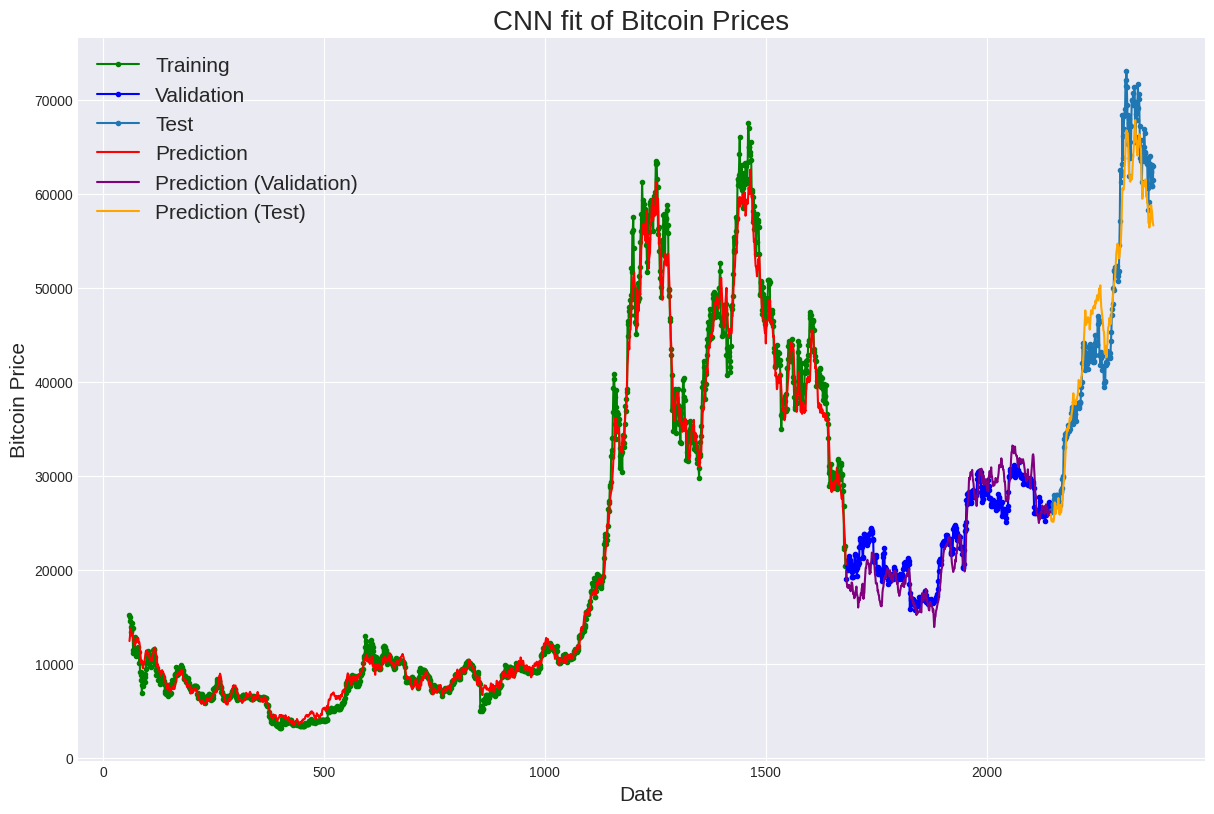

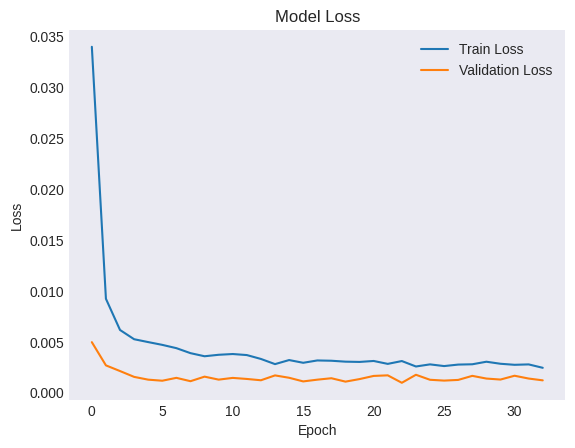

In [ ]:
model_cnn, history_cnn, test_rmse_cnn, test_r2_cnn, test_mae_cnn, val_rmse_cnn, val_mae_cnn, val_r2_cnn = train_evaluate_cnn(X_train, X_val, X_test, y_train, y_val, y_test, price_scaler, train_size, val_size, df)

- **5.4 Model comparison based on test set**

<ipython-input-62-84143b9834a4>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


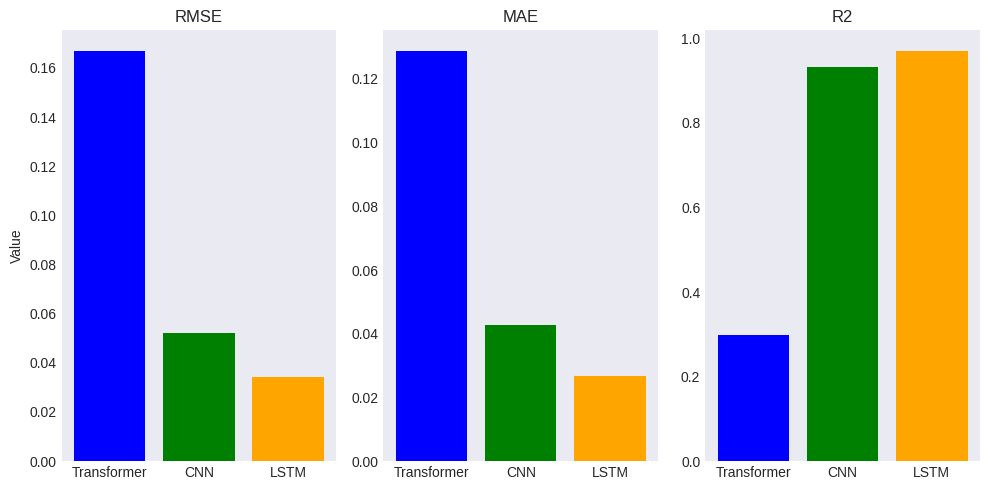

In [ ]:
# Define model names
models = ['Transformer', 'CNN', 'LSTM']

# RMSE values
rmse_values = [test_rmse_transformer, test_rmse_cnn, test_rmse_lstm]

# MAE values
mae_values = [test_mae_transformer, test_mae_cnn, test_mae_lstm]

# R2 values
r2_values = [test_r2_transformer, test_r2_cnn, test_r2_lstm]

plt.style.use('seaborn-dark')

# Plotting RMSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(models, rmse_values, color=['blue', 'green', 'orange'])
plt.title('RMSE')
plt.ylabel('Value')

# Plotting MAE
plt.subplot(1, 3, 2)
plt.bar(models, mae_values, color=['blue', 'green', 'orange'])
plt.title('MAE')

# Plotting R2
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color=['blue', 'green', 'orange'])
plt.title('R2')

plt.tight_layout()
plt.show()

###  6) Simulation of the Trading Strategy


### Overview
The purpose of this function is to simulate a simple trading strategy based on the predicted prices from the LSTM model. It allows us to evaluate the effectiveness of the predictions in a trading context by simulating buying and selling actions and calculating the resulting portfolio value over time.

### Trading Strategy Simulation

#### Function: `simulate_trading`

This function performs the following steps:

1. **Initialization**:
   - **Initial Cash**: Starts with an initial cash amount of $100,000.
   - **Cash and Stock Holding**: Initializes variables for cash and stock holdings.
   - **Positions**: Keeps track of the portfolio value at each time step.

2. **Trading Logic**:
   - Iterates over the predicted prices.
   - **Buy Signal**: If the predicted price increases, it buys stock using all available cash.
   - **Sell Signal**: If the predicted price decreases, it sells all the stock held.
   - Calculates the portfolio value at each step, which includes both the current cash and the value of the stock holdings.

3. **Final Portfolio Value**:
   - Calculates the final portfolio value by considering the remaining cash and the value of any stock holdings at the end of the period.
   - **Profit and Return Rate**: Computes the total profit and the return rate based on the initial cash.

4. **Results DataFrame**:
   - Stores the portfolio value, profit, and return rate in a DataFrame for further analysis.

### Performance Metrics

#### Function: `calculate_cumulative_returns`

- Calculates cumulative returns based on daily returns.
- **Cumulative Returns**: Represents the total return achieved by reinvesting the profits at each step.

#### Function: `calculate_sharpe_ratio`

- Computes the Sharpe ratio, which measures the risk-adjusted return.
- **Risk-Free Rate**: Assumes a 2% annualized risk-free rate.
- **Excess Returns**: The return over and above the risk-free rate.
- **Sharpe Ratio**: The ratio of the mean excess return to the standard deviation of the excess return, indicating the reward per unit of risk.

#### Function: `calculate_drawdowns`

- Calculates drawdowns to assess the magnitude of loss experienced by the strategy.
- **Drawdown**: The peak-to-trough decline in portfolio value, representing the risk of substantial loss.

### Application and Visualization

1. **Simulate Trading**:
   - Applies the `simulate_trading` function to the actual and predicted prices.

2. **Calculate Daily Returns**:
   - Computes daily returns based on the portfolio value changes.

3. **Performance Metrics**:
   - **Cumulative Returns**: Calculates the cumulative returns over time.
   - **Sharpe Ratio**: Computes the Sharpe ratio to assess the risk-adjusted return.
   - **Drawdowns**: Analyzes drawdowns to understand the risk of significant losses.

4. **Visualization**:
   - **Portfolio Value**: Plots the portfolio value over time.
   - **Profit**: Plots the profit over time.
   - **Cumulative Returns**: Plots the cumulative returns over time.
   - **Drawdowns**: Plots the drawdowns over time.


- **6.1 LSTM Strategy**

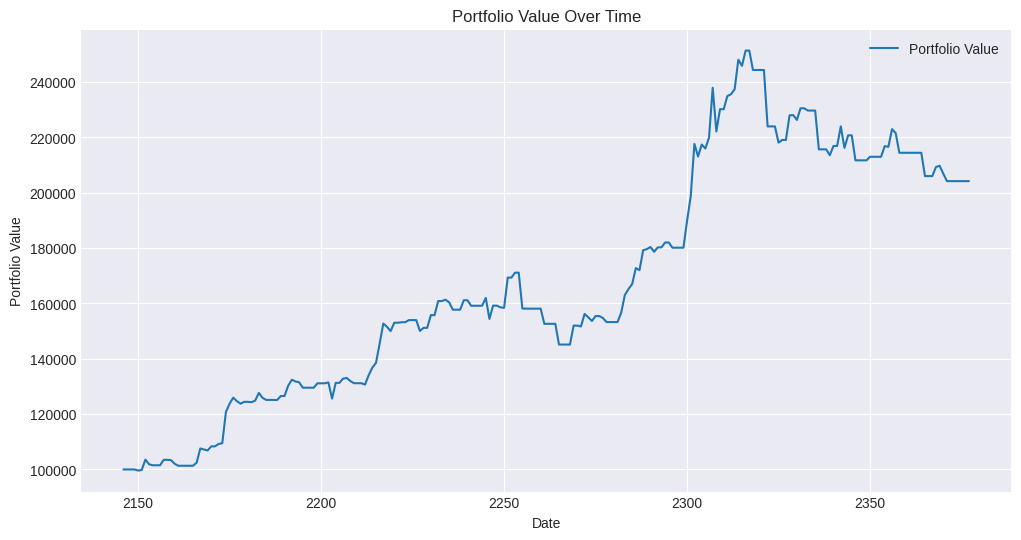

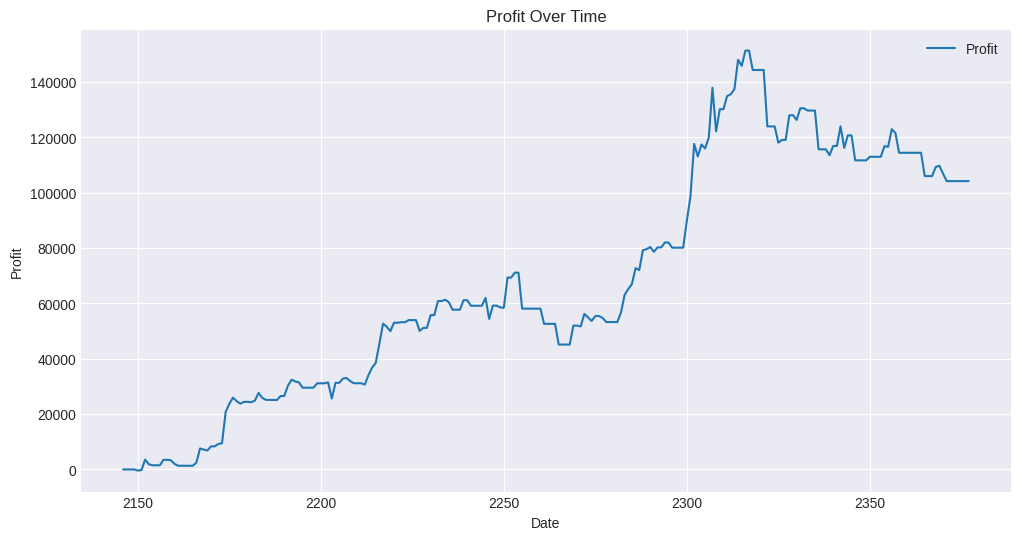

Mean Profit: $67707.57
Standard Deviation of Profit: $42681.65
Max Drawdown: $-406.44
Total Profit: $104192.93
Return Rate: 104.19%


In [ ]:
# Simulate trading
def simulate_trading(df, actual_prices, predicted_prices):
    # Initialize variables
    initial_cash = 100000  # Initial amount of cash to start trading
    cash = initial_cash
    stock_holding = 0
    positions = []  # List to store the positions (cash, stock_holding, portfolio_value)

    # Iterate over the predicted prices and actual prices
    for i in range(1, len(predicted_prices)):
        if predicted_prices[i] > predicted_prices[i - 1]:  # Predicted price increase, buy signal
            if cash > 0:  # If there is cash available, buy stock
                stock_holding = cash / actual_prices[i]
                cash = 0  # All cash is used to buy stocks
        elif predicted_prices[i] < predicted_prices[i - 1]:  # Predicted price decrease, sell signal
            if stock_holding > 0:  # If there are stocks available, sell them
                cash = stock_holding * actual_prices[i]
                stock_holding = 0  # All stocks are sold

        # Calculate the portfolio value
        portfolio_value = cash + stock_holding * actual_prices[i]
        positions.append(portfolio_value)

    # Final portfolio value
    final_portfolio_value = cash + stock_holding * actual_prices[-1]

    # Calculate profit and return
    total_profit = final_portfolio_value - initial_cash
    return_rate = total_profit / initial_cash

    # Create a DataFrame to store results
    results = pd.DataFrame(positions, columns=['Portfolio Value'], index=df.index[1:1+len(positions)])
    results['Profit'] = results['Portfolio Value'] - initial_cash
    results['Return Rate'] = results['Profit'] / initial_cash

    return results, total_profit, return_rate

# `model`, `history`, `time_y_test`, and `time_y_test_prediction` are defined and contain LSTM model results
# `time_y_test` and `time_y_test_prediction` contain the same date indices as in `df`

trading_results, total_profit, return_rate = simulate_trading(df.loc[time_y_test.index], time_y_test['Actual'].values, time_y_test_prediction['Prediction'].values)

# Plot portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(trading_results['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid()
plt.show()

# Plot profit over time
plt.figure(figsize=(12, 6))
plt.plot(trading_results['Profit'], label='Profit')
plt.title('Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

# Analyze variability of profitability
mean_profit = trading_results['Profit'].mean()
std_profit = trading_results['Profit'].std()
max_drawdown = trading_results['Profit'].min()

print(f'Mean Profit: ${mean_profit:.2f}')
print(f'Standard Deviation of Profit: ${std_profit:.2f}')
print(f'Max Drawdown: ${max_drawdown:.2f}')
print(f'Total Profit: ${total_profit:.2f}')
print(f'Return Rate: {return_rate:.2%}')


Cumulative Returns: 1.041929269428353
Sharpe Ratio: 0.1467651156862757
Maximum Drawdown: -0.4717660348785473


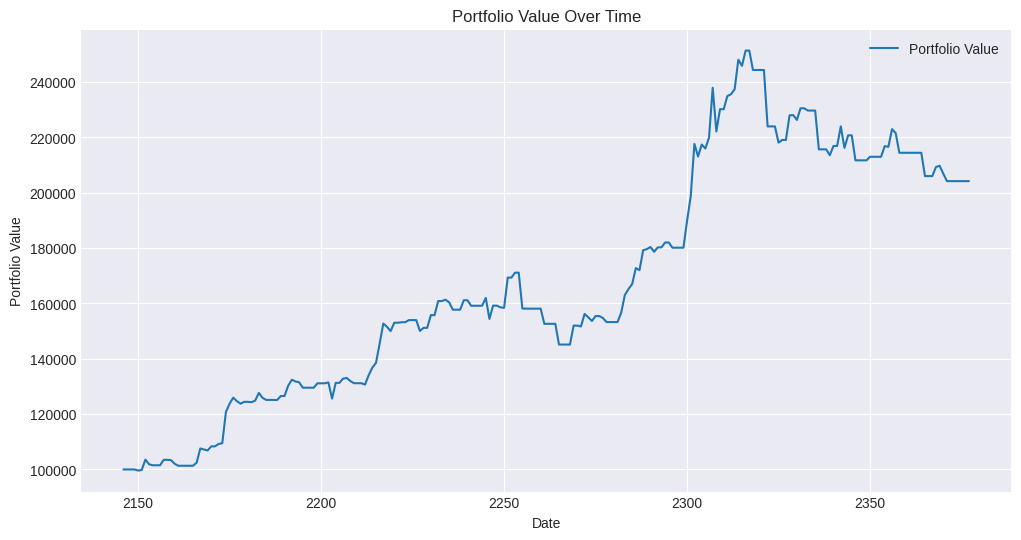

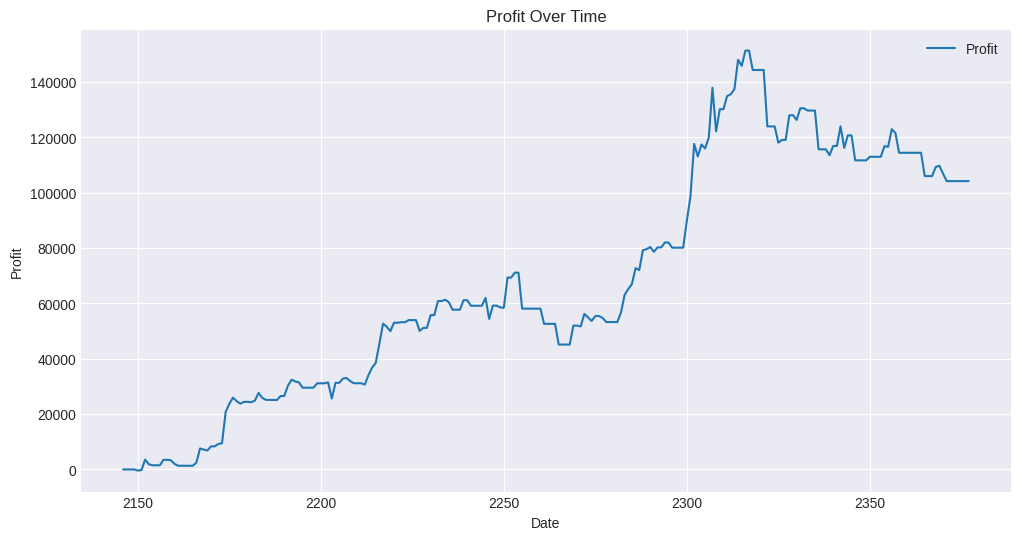

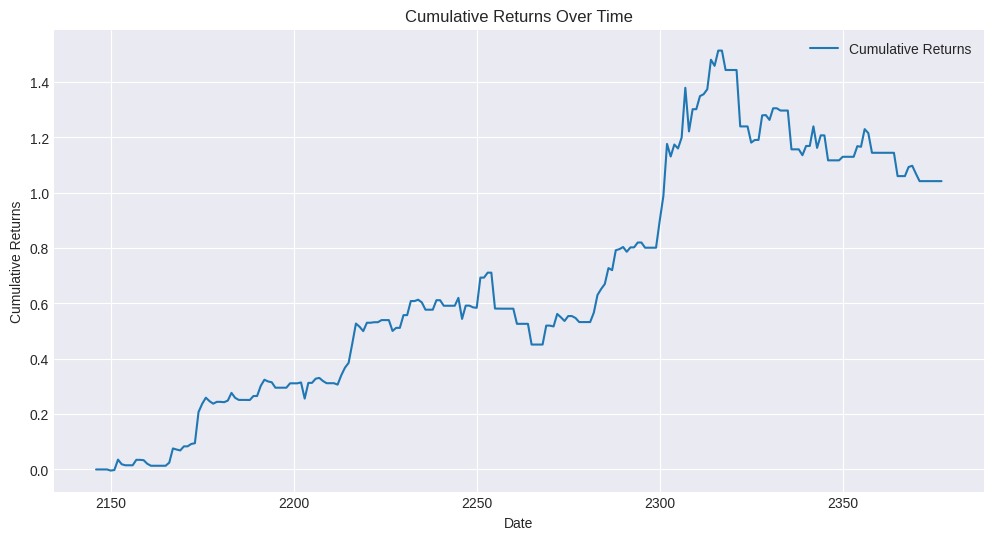

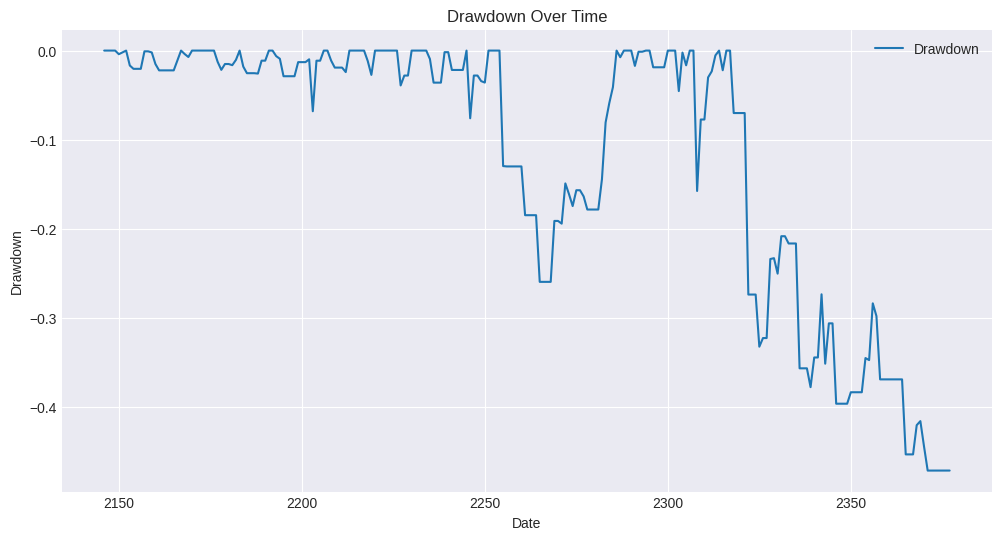

In [ ]:
def simulate_trading(df, actual_prices, predicted_prices):
    # Initialize variables
    initial_cash = 100000  # Initial amount of cash to start trading
    cash = initial_cash
    stock_holding = 0
    positions = []  # List to store the positions (cash, stock_holding, portfolio_value)

    # Iterate over the predicted prices and actual prices
    for i in range(1, len(predicted_prices)):
        if predicted_prices[i] > predicted_prices[i - 1]:  # Predicted price increase, buy signal
            if cash > 0:  # If there is cash available, buy stock
                stock_holding = cash / actual_prices[i]
                cash = 0  # All cash is used to buy stocks
        elif predicted_prices[i] < predicted_prices[i - 1]:  # Predicted price decrease, sell signal
            if stock_holding > 0:  # If there are stocks available, sell them
                cash = stock_holding * actual_prices[i]
                stock_holding = 0  # All stocks are sold

        # Calculate the portfolio value
        portfolio_value = cash + stock_holding * actual_prices[i]
        positions.append(portfolio_value)

    # Final portfolio value
    final_portfolio_value = cash + stock_holding * actual_prices[-1]

    # Calculate profit and return
    total_profit = final_portfolio_value - initial_cash
    return_rate = total_profit / initial_cash

    # Create a DataFrame to store results
    results = pd.DataFrame(positions, columns=['Portfolio Value'], index=df.index[1:1+len(positions)])
    results['Profit'] = results['Portfolio Value'] - initial_cash
    results['Return Rate'] = results['Profit'] / initial_cash

    return results, total_profit, return_rate

def calculate_cumulative_returns(returns):
    cumulative_returns = (returns + 1).cumprod() - 1
    return cumulative_returns

def calculate_sharpe_ratio(returns, risk_free_rate):
    excess_returns = returns - risk_free_rate / 252  # Assuming daily returns and annualized risk-free rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std()
    return sharpe_ratio

def calculate_drawdowns(returns):
    cumulative_returns = calculate_cumulative_returns(returns)
    max_return = cumulative_returns.cummax()
    drawdowns = cumulative_returns - max_return
    return drawdowns

# Assuming `model`, `history`, `time_y_test`, and `time_y_test_prediction` are defined and contain your LSTM model results
# Make sure `time_y_test` and `time_y_test_prediction` contain the same date indices as in `df`

trading_results, total_profit, return_rate = simulate_trading(df.loc[time_y_test.index], time_y_test['Actual'].values, time_y_test_prediction['Prediction'].values)

# Calculate daily returns
trading_results['Daily Returns'] = trading_results['Portfolio Value'].pct_change().fillna(0)

# Define risk-free rate
risk_free_rate = 0.02  # 2% annualized risk-free rate

# Calculate cumulative returns
trading_results['Cumulative Returns'] = calculate_cumulative_returns(trading_results['Daily Returns'])

# Calculate Sharpe ratio
sharpe_ratio = calculate_sharpe_ratio(trading_results['Daily Returns'], risk_free_rate)

# Calculate drawdowns
trading_results['Drawdown'] = calculate_drawdowns(trading_results['Daily Returns'])

# Print or visualize the metrics
print("Cumulative Returns:", trading_results['Cumulative Returns'].iloc[-1])
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", trading_results['Drawdown'].min())

# Plot portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(trading_results['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid()
plt.show()

# Plot profit over time
plt.figure(figsize=(12, 6))
plt.plot(trading_results['Profit'], label='Profit')
plt.title('Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

# Plot cumulative returns over time
plt.figure(figsize=(12, 6))
plt.plot(trading_results['Cumulative Returns'], label='Cumulative Returns')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

# Plot drawdowns over time
plt.figure(figsize=(12, 6))
plt.plot(trading_results['Drawdown'], label='Drawdown')
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid()
plt.show()


In [ ]:
trading_results

,Portfolio Value,Profit,Return Rate,Daily Returns,Cumulative Returns,Drawdown
2146,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2147,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2148,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2149,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2150,99593.560752,-406.439248,-0.004064,-0.004064,-0.004064,-0.004064
...,...,...,...,...,...,...
2373,204189.791203,104189.791203,1.041898,0.000000,1.041898,-0.471766
2374,204189.791203,104189.791203,1.041898,0.000000,1.041898,-0.471766
2375,204192.926943,104192.926943,1.041929,0.000015,1.041929,-0.471735
2376,204192.926943,104192.926943,1.041929,0.000000,1.041929,-0.471735
